# <center>HEART DISEASE CLASSIFICATION</center>

# **TABLE OF CONTENTS**

**ABOUT DATASET**

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**MODEL BUILDING WITHOUT HANDLING IMBALANCE**

**MODEL BUILDING WITH UNDERSAMPLING TECHNIQUES**

**MODEL BUILDING WITH OVERSAMPLING TECHNIQUES**

**CONCLUSIONS**

# 1. ABOUT DATASET

The Personal Key Indicators of Heart Disease dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient:

| **Feature**    | **Description** |
| :-------- | :------- |
| **HeartDisease**| Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)    |
| **BMI**| Body Mass Index (BMI)     |
| **Smoking**    | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]    |
| **AlcoholDrinking**    |Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week    |
| **Stroke**    | (Ever told) (you had) a stroke?    |
| **PhysicalHealth**    |Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30    |
| **MentalHealth**    | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?    |
| **DiffWalking**    | Do you have serious difficulty walking or climbing stairs?    |
| **Sex**    | Are you male or female?    |
| **AgeCategory**    | Fourteen-level age category    |
| **Race**    | Imputed race/ethnicity value    |
| **Diabetic**    | (Ever told) (you had) diabetes?    |
| **PhysicalActivity**    | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job    |
| **GenHealth**    | Would you say that in general your health is.    |
| **SleepTime**   | On average, how many hours of sleep do you get in a 24-hour period?    |
| **Asthma**    | (Ever told) (you had) asthma?    |
| **KidneyDisease**    | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?    |
| **SkinCancer**    | (Ever told) (you had) skin cancer?   |


# 2. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
np.random.seed(0)

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 3. LOADING DATASET

In [2]:
df= pd.read_csv("D:\KIIT\KIIT 3RD YEAR\SIXTH SEMESTER\Minor Project\heart_2020_cleaned.csv", sep= ',' , encoding= ' utf-8')
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

# 4. EDA

In [3]:
df.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN          No  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top          No              Yes  Very good            NaN      No   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

### 4.1. Finding Outliers

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32228\1374297858.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="SleepTime",hue='HeartDisease',shade='True')
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you w

<Axes: xlabel='SleepTime', ylabel='Density'>

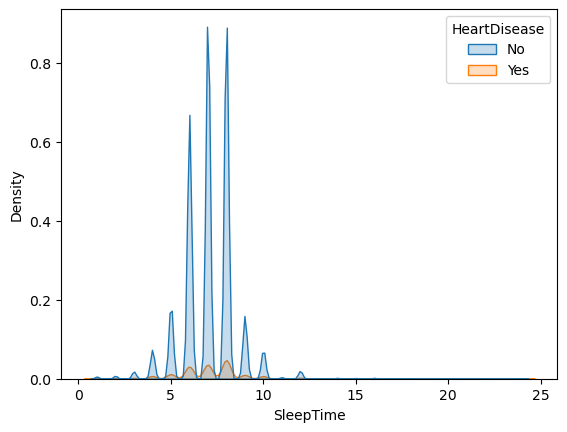

In [9]:
sns.kdeplot(data=df,x="SleepTime",hue='HeartDisease',shade='True')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32228\4147439825.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='MentalHealth',hue='HeartDisease',shade=True)#,palette=["#8BE8E5","#FF0000"])
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping

<Axes: xlabel='MentalHealth', ylabel='Density'>

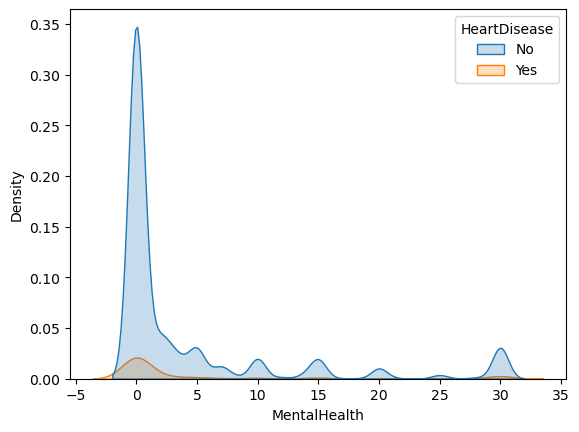

In [10]:
sns.kdeplot(data=df,x='MentalHealth',hue='HeartDisease',shade=True)#,palette=["#8BE8E5","#FF0000"])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32228\4264938405.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='BMI',hue='HeartDisease',shade=True)#,palette=["#0B666A","#FF0000"])
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a l

<Axes: xlabel='BMI', ylabel='Density'>

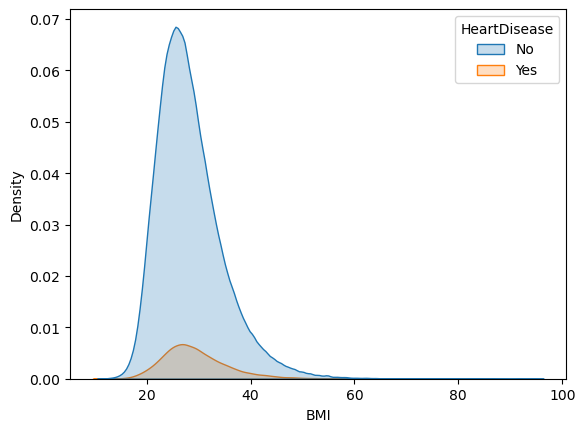

In [11]:
sns.kdeplot(data=df,x='BMI',hue='HeartDisease',shade=True)#,palette=["#0B666A","#FF0000"])

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='PhysicalHealth', ylabel='Density'>

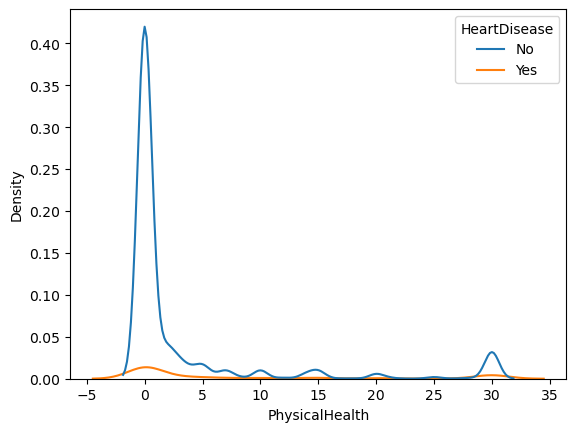

In [12]:
sns.kdeplot(data=df,x='PhysicalHealth',hue='HeartDisease')#,palette=['#F0DE36','#7A9D54'])

### Q1 : What is the raio of HeartDisease ?

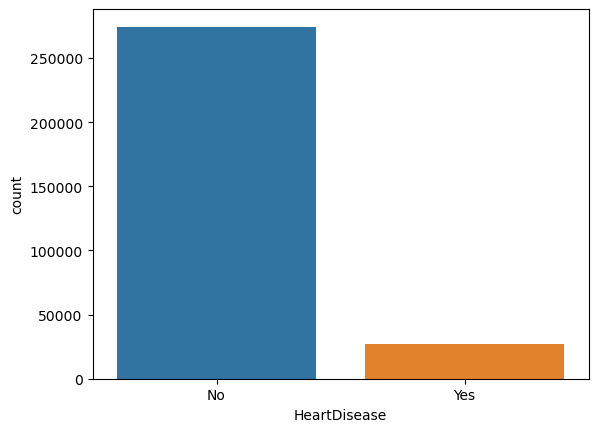

In [13]:
sns.countplot(data= df, x="HeartDisease")
plt.show()

### Q2 : what is the raio between Sex and HeartDisease ?

In [14]:
fig = px.sunburst(df, path=['Sex','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

#### The ratio is very close between male and female

### Q3: what is the corr_ between BMI and SleepTime?

Text(0.5, 1.0, 'BMI and HeartDisease')

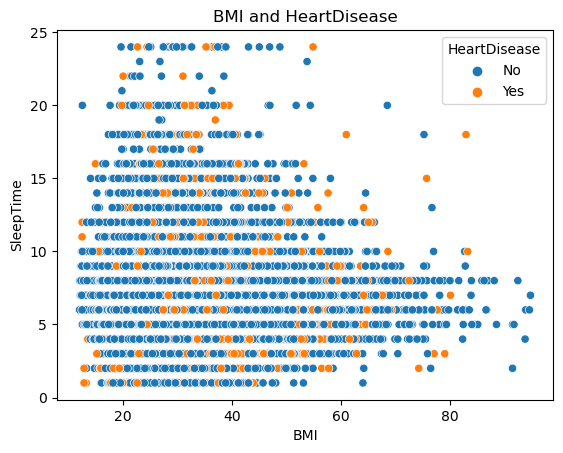

In [15]:
sns.scatterplot(df,x="BMI",y="SleepTime",hue="HeartDisease")#,palette=["#0B666A","#FF0000"])
plt.title("BMI and HeartDisease")

### Q4 : what is the count of Heartdisease with Age ?

<Axes: title={'center': 'AgeCategory with HeartDisease'}, xlabel='AgeCategory', ylabel='count'>

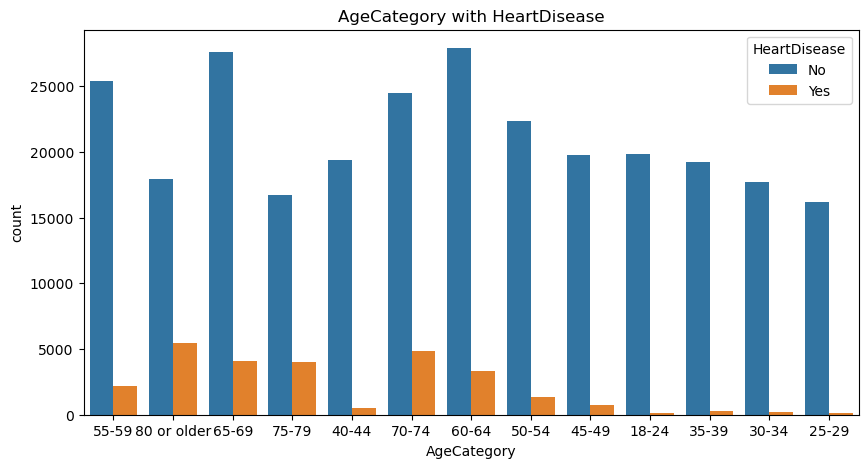

In [16]:
plt.figure(figsize = (10,5))
plt.title("AgeCategory with HeartDisease")
sns.countplot(df,x="AgeCategory",hue="HeartDisease")#,palette=["#8BE8E5","#FF0000"])

### Q5 : what is the ratio between Heartdisease and GenHealth ?

<Axes: title={'center': 'GenHealth and HeartDisease'}, xlabel='GenHealth', ylabel='count'>

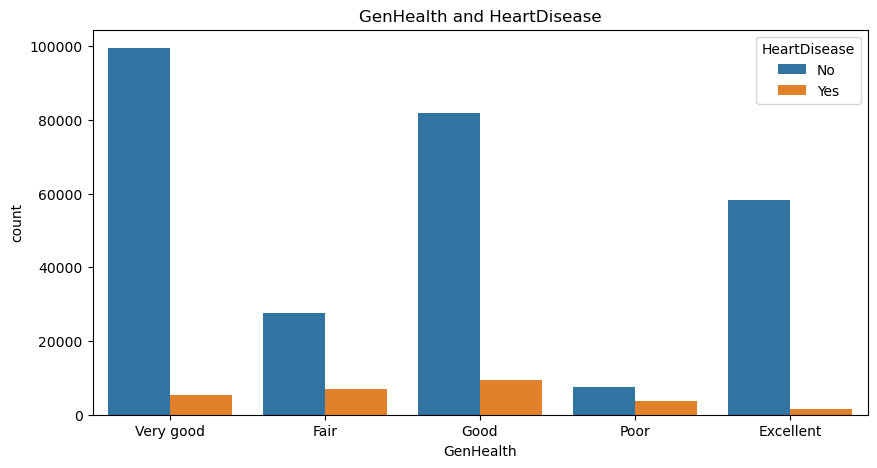

In [17]:
plt.figure(figsize = (10,5))
plt.title("GenHealth and HeartDisease")
sns.countplot(df,x="GenHealth",hue="HeartDisease")#,palette=["#8BE8E5","#FFB07F"])

### Q6 : what is the raio between HeartDisease and SkinCancer ?

In [18]:
da2=df.groupby('SkinCancer')['HeartDisease'].value_counts().reset_index(name='count')
fig = px.sunburst(df, path=['SkinCancer','HeartDisease'],color_discrete_sequence = ['green']).update_traces(textinfo='label+percent parent')
fig.show()

### Q7 : what is the ratio between HeartDisease and Asthma?

Text(0.5, 1.0, 'Count of Asthma with HeartDisease')

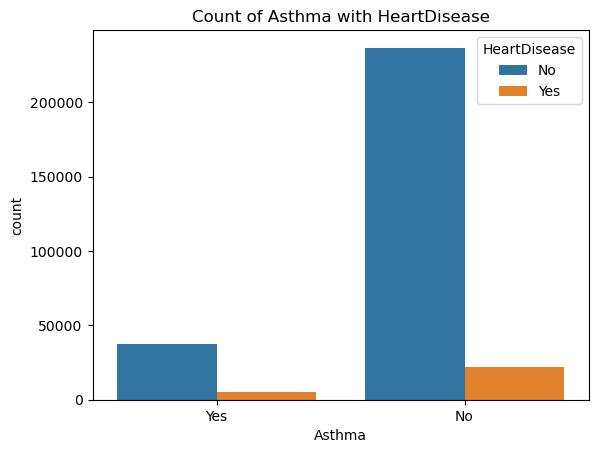

In [19]:
sns.countplot(df,x='Asthma',hue="HeartDisease")#,palette=["#A78295","#35A29F"])
plt.title("Count of Asthma with HeartDisease")

# 5. What's imbalance dataset

Class imbalance is a problem that occurs in machine learning classification problems. It merely tells that the target class’s frequency is highly imbalanced, i.e., the occurrence of one of the classes is very high compared to the other classes present. In other words, there is a bias or skewness towards the majority class present in the target. Suppose we consider a binary classification where the majority target class has 10000 rows, and the minority target class has only 100 rows. In that case, the ratio is 100:1, i.e., for every 100 majority class, there is only one minority class present. This problem is what we refer to as class imbalance. Some of the general areas where we can find such data are fraud detection, churn prediction, medical diagnosis, e-mail classification, etc.<br><br>
We will be working on a dataset from the medical domain to understand class imbalance properly. Here, we have to predict whether a person will have a heart stroke or not based on the given attributes(independent variables).

#### Imbalanced data is a common problem in machine learning, which brings challenges to feature correlation, class separation and evaluation, and results in poor model performance.

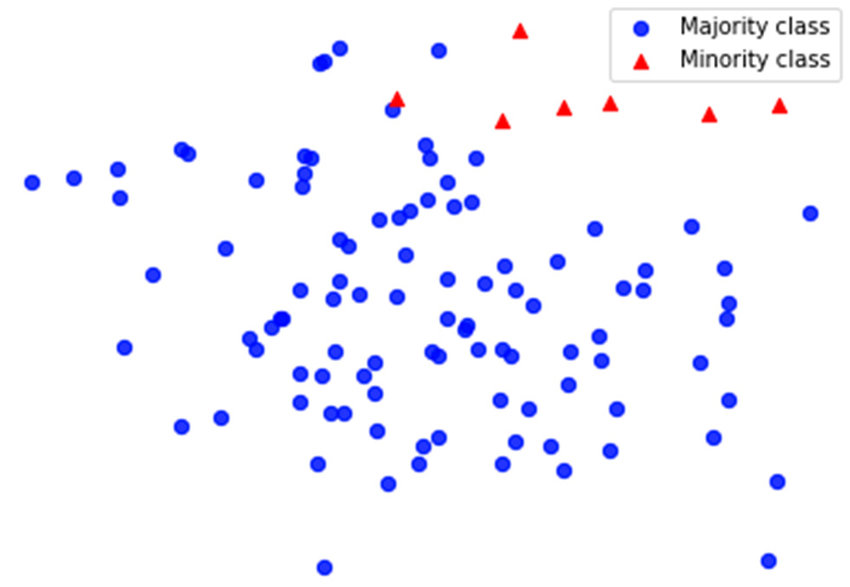

### The majority class is the class with the highest number of samples.
### The minority class is the class with the lowest number of samples.
#### The class ratio for a given dataset is defined as the ratio between the size of the minority class and the size of the majority class.
#### Empirically, data ratios of at least 25% do not affect performance by large margins. This is no longer true, however, as the ratio becomes smaller.

# 6. Sampling techniques to handle imbalanced data

# 6.1. Models without handling imbalanced data

### Our target is HeartDisease !

In [20]:
da2=df['HeartDisease'].value_counts().reset_index(name='count')
da2

HeartDisease   count
0           No  274456
1          Yes   27261

([<matplotlib.patches.Wedge at 0x1f8800bee00>,
 [Text(-1.0559821726450649, 0.3080611157803087, 'No'),
  Text(1.055982158223682, -0.30806116521440213, 'Yes')],
 [Text(-0.5759902759882171, 0.16803333588016836, '91%'),
  Text(0.5759902681220083, -0.16803336284421933, '9%')])

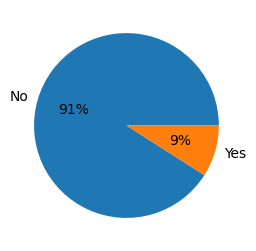

In [21]:
plt.figure(figsize = (3,3))
plt.pie(da2['count'], labels=['No','Yes'], autopct='%.0f%%')#,colors=["#ADA190","#BB0880"],)

## 6.1.1. Label Encoding

In [22]:
data1=df.copy()
le = LabelEncoder()
le.fit(data1['HeartDisease'])
data1['HeartDisease']=le.transform(data1['HeartDisease'])

le.fit(data1['Smoking'])
data1['Smoking']=le.transform(data1['Smoking'])

le.fit(data1['AlcoholDrinking'])
data1['AlcoholDrinking']=le.transform(data1['AlcoholDrinking'])

le.fit(data1['Stroke'])
data1['Stroke']=le.transform(data1['Stroke'])

le.fit(data1['DiffWalking'])
data1['DiffWalking']=le.transform(data1['DiffWalking'])

le.fit(data1['Sex'])
data1['Sex']=le.transform(data1['Sex'])

le.fit(data1['AgeCategory'])
data1['AgeCategory']=le.transform(data1['AgeCategory'])

le.fit(data1['Race'])
data1['Race']=le.transform(data1['Race'])

le.fit(data1['Diabetic'])
data1['Diabetic']=le.transform(data1['Diabetic'])


le.fit(data1['PhysicalActivity'])
data1['PhysicalActivity']=le.transform(data1['PhysicalActivity'])

le.fit(data1['GenHealth'])
data1['GenHealth']=le.transform(data1['GenHealth'])

le.fit(data1['Asthma'])
data1['Asthma']=le.transform(data1['Asthma'])

le.fit(data1['KidneyDisease'])
data1['KidneyDisease']=le.transform(data1['KidneyDisease'])

le.fit(data1['SkinCancer'])
data1['SkinCancer']=le.transform(data1['SkinCancer'])

In [23]:
data1

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    0            7     5         2   
1                0.0            0    0           12     5         0   
2               30.0            0    1            9     5         2   
3                0.0            0    0           11     5         0   
4                0.0            1    0            4     5         0   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1    1            8     3         2   
319791           0.0            0    1            3     3         0   
319792           0.0            0    0            5     3         0   
319793           0.0            0    0            1     3         0   
319794           0.0            0    0           12     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4        5.0       1              0   
1                      1          4        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          4        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1        6.0       1              0   
319791                 1          4        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[301717 rows x 18 columns]

In [24]:
#x=data1[['HeartDisease','BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer']]
#sns.pairplot(x,hue='HeartDisease')

### 6.1.2. Correlation Matrix

In [25]:
data1.corr()

HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          1.000000  0.047260  0.104524        -0.036289  0.194665   
BMI                   0.047260  1.000000  0.015890        -0.043463  0.016314   
Smoking               0.104524  0.015890  1.000000         0.109183  0.058868   
AlcoholDrinking      -0.036289 -0.043463  0.109183         1.000000 -0.022707   
Stroke                0.194665  0.016314  0.058868        -0.022707  1.000000   
PhysicalHealth        0.165235  0.103813  0.110270        -0.023255  0.132966   
MentalHealth          0.020913  0.056724  0.078364         0.045421  0.041324   
DiffWalking           0.196420  0.177388  0.115789        -0.041135  0.170664   
Sex                   0.074435  0.024200  0.087514         0.006824 -0.001343   
AgeCategory           0.239259 -0.006069  0.128259        -0.060761  0.141537   
Race                  0.042720 -0.030300  0.075682         0.043128  0.001201   
Diabetic              0.163686  0.198268  0.047086        -0.063423  0.097767   
PhysicalActivity     -0.093597 -0.144441 -0.089864         0.024408 -0.074898   
GenHealth            -0.012220  0.029233  0.014055         0.001871 -0.009846   
SleepTime             0.010834 -0.048653 -0.027874        -0.003172  0.013697   
Asthma                0.035784  0.087563  0.017545        -0.007114  0.034942   
KidneyDisease         0.142672  0.047796  0.031890        -0.031166  0.089109   
SkinCancer            0.090644 -0.038060  0.030438        -0.008739  0.046039   

                  PhysicalHealth  MentalHealth  DiffWalking       Sex  \
HeartDisease            0.165235      0.020913     0.196420  0.074435   
BMI                     0.103813      0.056724     0.177388  0.024200   
Smoking                 0.110270      0.078364     0.115789  0.087514   
AlcoholDrinking        -0.023255      0.045421    -0.041135  0.006824   
Stroke                  0.132966      0.041324     0.170664 -0.001343   
PhysicalHealth          1.000000      0.279657     0.422935 -0.038427   
MentalHealth            0.279657      1.000000     0.142964 -0.098916   
DiffWalking             0.422935      0.142964     1.000000 -0.067335   
Sex                    -0.038427     -0.098916    -0.067335  1.000000   
AgeCategory             0.114623     -0.158608     0.250407 -0.060620   
Race                    0.010179     -0.002489    -0.005648  0.015599   
Diabetic                0.143418      0.022475     0.198877 -0.010581   
PhysicalActivity       -0.224121     -0.084274    -0.271748  0.045309   
GenHealth              -0.037669     -0.005259    -0.045966 -0.011778   
SleepTime              -0.058406     -0.117078    -0.019155 -0.014901   
Asthma                  0.110083      0.105266     0.095826 -0.067960   
KidneyDisease           0.138219      0.032105     0.149471 -0.007579   
SkinCancer              0.036753     -0.040214     0.060596  0.015846   

                  AgeCategory      Race  Diabetic  PhysicalActivity  \
HeartDisease         0.239259  0.042720  0.163686         -0.093597   
BMI                 -0.006069 -0.030300  0.198268         -0.144441   
Smoking              0.128259  0.075682  0.047086         -0.089864   
AlcoholDrinking     -0.060761  0.043128 -0.063423          0.024408   
Stroke               0.141537  0.001201  0.097767         -0.074898   
PhysicalHealth       0.114623  0.010179  0.143418         -0.224121   
MentalHealth        -0.158608 -0.002489  0.022475         -0.084274   
DiffWalking          0.250407 -0.005648  0.198877         -0.271748   
Sex                 -0.060620  0.015599 -0.010581          0.045309   
AgeCategory          1.000000  0.165041  0.199065         -0.125294   
Race                 0.165041  1.000000 -0.042948          0.045198   
Diabetic             0.199065 -0.042948  1.000000         -0.125068   
PhysicalActivity    -0.125294  0.045198 -0.125068          1.000000   
GenHealth            0.036864  0.051896 -0.012309          0.026726   
SleepTime            0.10

<Axes: >

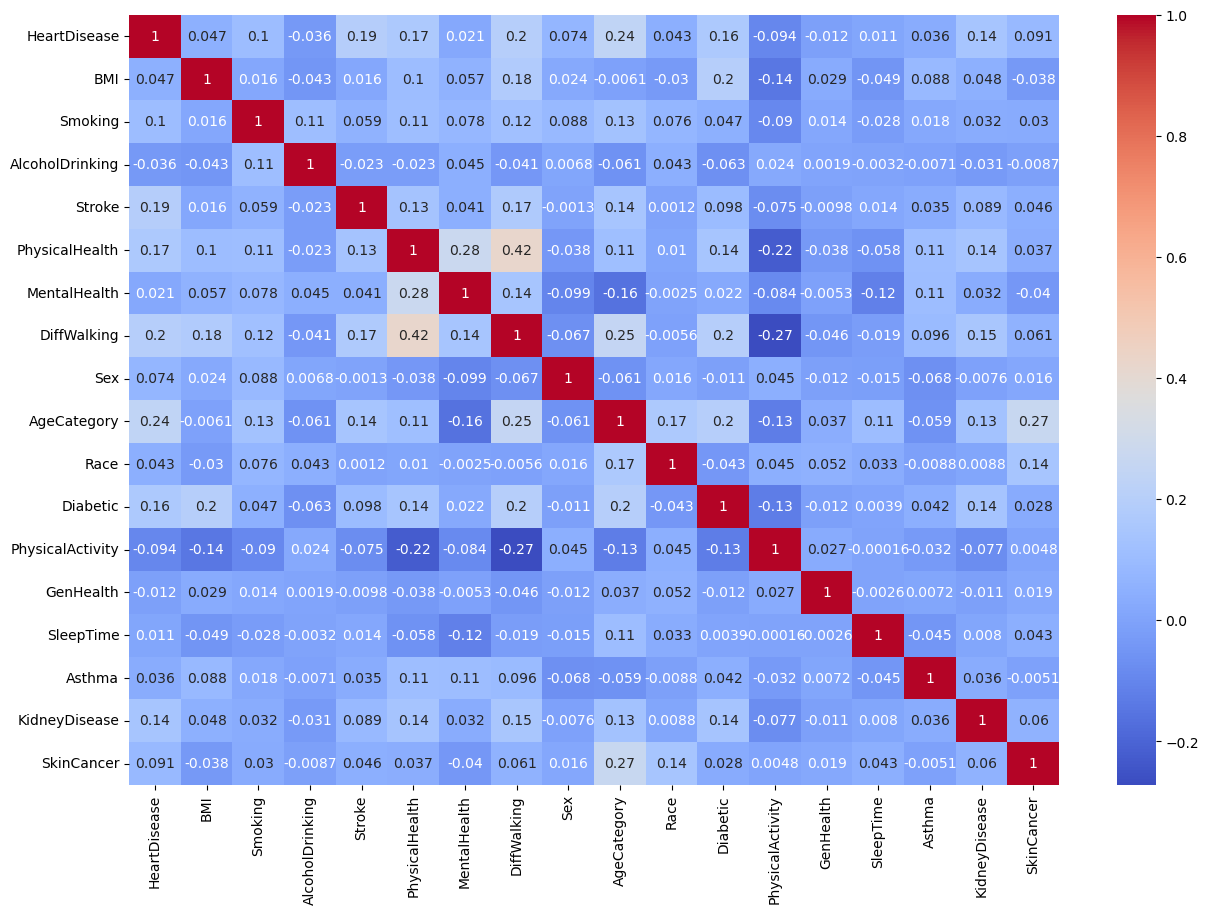

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,cmap='coolwarm')#cmap='Reds')

In [27]:
# columns for detailed visualisation
#cols=['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth',
 #     'MentalHealth','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity',
  #    'GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer']

#for i in cols:
 #   sns.swarmplot(x=data1["HeartDisease"], y=data1[i], color="black", alpha=0.5 )
  #  sns.boxenplot(x=data1["HeartDisease"], y=data1[i]) # palette=colours
   # plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will 

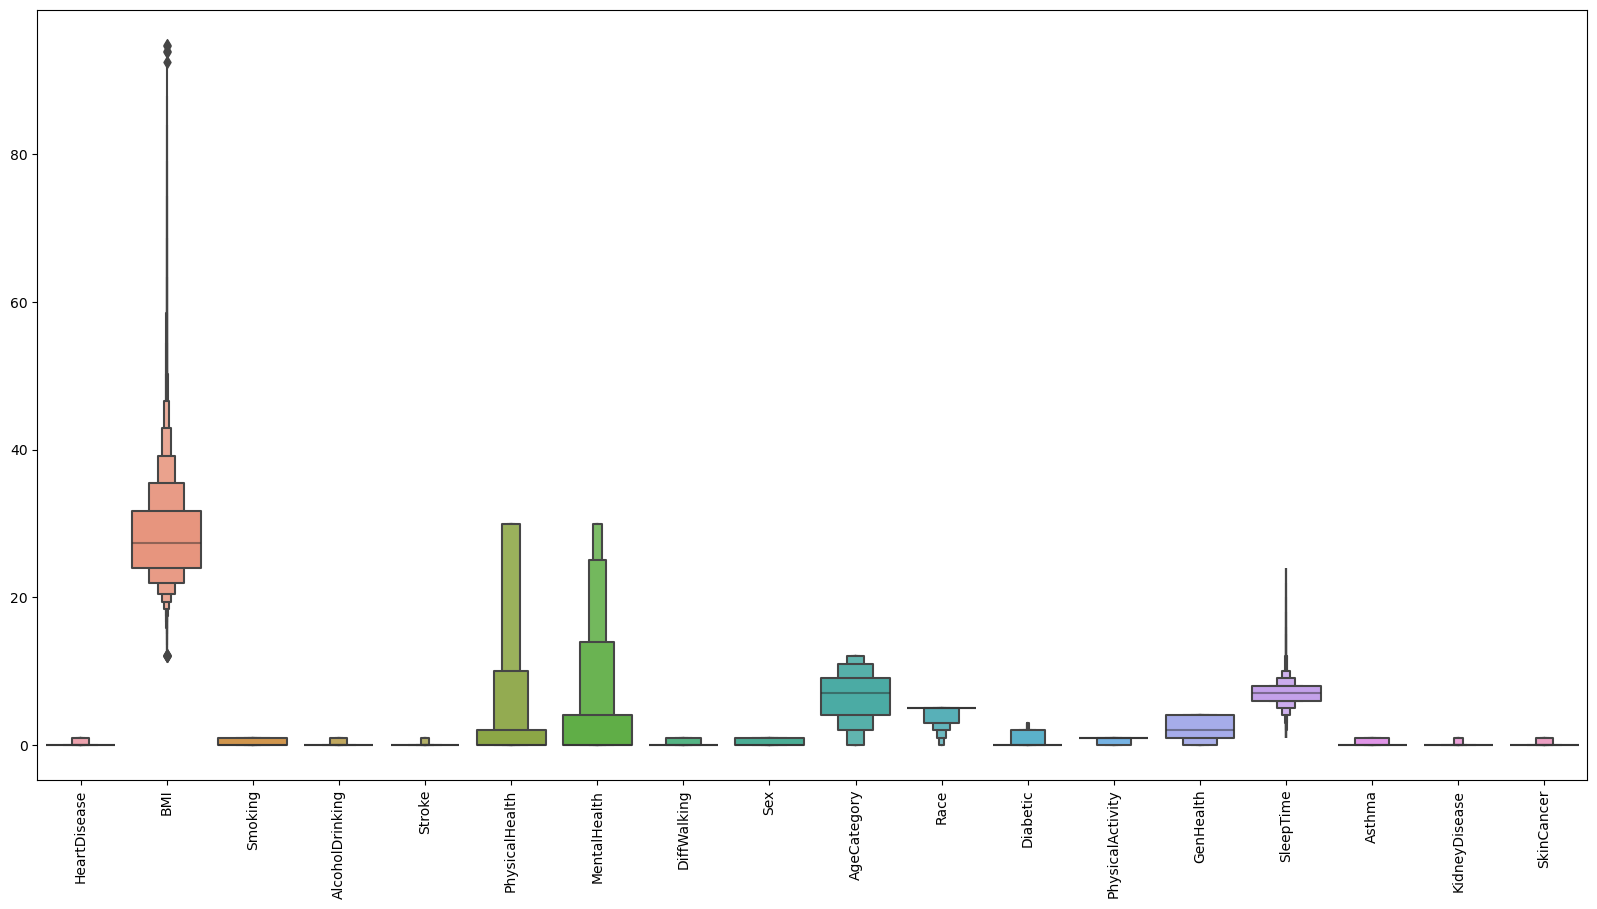

In [28]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data1) #,palette = shades
plt.xticks(rotation=90)
plt.show()

### 6.1.3. VIF Test

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#data32.drop(['Height',"Weight"],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
print(vif_data)

             feature        VIF
0       HeartDisease   1.261846
1                BMI  14.752823
2            Smoking   1.849158
3    AlcoholDrinking   1.105373
4             Stroke   1.117703
5     PhysicalHealth   1.601333
6       MentalHealth   1.447573
7        DiffWalking   1.642438
8                Sex   1.957113
9        AgeCategory   5.673312
10              Race  12.434147
11          Diabetic   1.345429
12  PhysicalActivity   4.336965
13         GenHealth   3.141494
14         SleepTime  16.103139
15            Asthma   1.207833
16     KidneyDisease   1.102391
17        SkinCancer   1.208408


### 6.1.4. Split Data

In [31]:
from sklearn.model_selection import train_test_split
data2 = data1.copy()
X = data2.drop(["HeartDisease"] , axis = 1).values
y = data2["HeartDisease"].values

In [32]:
X_train , X_test , y_train ,y_test = train_test_split(X,y , test_size= 0.25 , random_state= 42)

In [33]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

NameError: name 'X_train' is not defined

## Importing Important Libraries

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

The models we will be using are:

* KNN(ERROR)
* Logistic Regression(DONE)
* Random Forest Classifier(DONE)
* SVC(ERROR)
* Decision Tree Classifier(DONE)
* XgBoost(DONE)
* SGD Classifier(DONE)
* Voting Classifier
* Ada Boost Classifier(DONE)
* Gradient Boosting Classifier(DONE)
* Stochastic Gradient Boosting(DONE)
* CAT Boost(DONE)
* Light Gradient Boosting(ERROR)
* Extra Trees Classifier(DONE)
* Linear Discriminant Analysis(DONE)
* Naive Bayes Classifier(DONE)
* Stacker Model
* Blender Model

### 6.1.5 Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [37]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


In [38]:
print(classification_report(y_test,CV_rfc.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68627
           1       0.79      0.01      0.01      6803

    accuracy                           0.91     75430
   macro avg       0.85      0.50      0.48     75430
weighted avg       0.90      0.91      0.87     75430



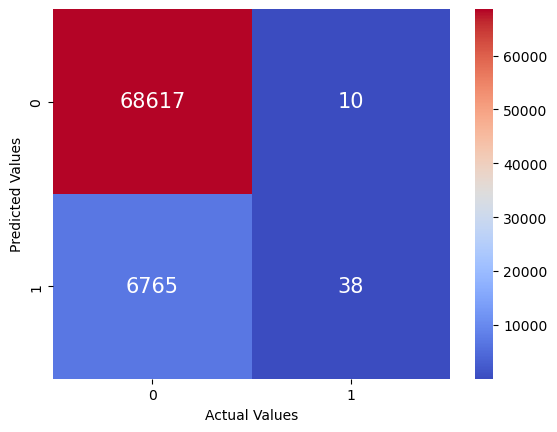

In [39]:
cf_matrix = confusion_matrix(y_test,CV_rfc.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [40]:
rf = RandomForestClassifier(random_state=42, criterion= 'gini', max_depth=5, max_features= 'sqrt', n_estimators= 500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
rf_f1 = f1_score(y_test, rf.predict(X_test), average='macro')
rf_precision = precision_score(y_test, rf.predict(X_test), average='macro')
rf_recall = recall_score(y_test, rf.predict(X_test), average='macro')
rf_mcc = matthews_corrcoef(y_test, rf.predict(X_test))

### Logistic Regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    {
        'C': [0.001,0.01,0.1,1,10,100,1000,2000,3500,5000,7500,10000,20000,35000,50000],
        'penalty': ['l2','l1'],
        'solver': ['liblinear','newton-cholesky', 'sag','newton-cg', 'lbfgs' ],
        #'n_jobs': [-1]
    }, 
    
]
logreg_cv=GridSearchCV(LogisticRegression(random_state=42,max_iter=30000),param_grid,cv=5)
logreg_cv.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


300 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=30000, random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3500,
                                5000, 7500, 10000, 20000, 35000, 50000],
                          'penalty': ['l2', 'l1'],
                          'solver': ['liblinear', 'newton-cholesky', 'sag',
                                     'newton-cg', 'lbfgs']}])

In [42]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy) )

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for our training dataset with tuning is : 91.07%


In [43]:
print(classification_report(y_test,logreg_cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.51      0.08      0.13      6803

    accuracy                           0.91     75430
   macro avg       0.72      0.53      0.54     75430
weighted avg       0.88      0.91      0.88     75430



In [44]:
log_reg = LogisticRegression(random_state=42,max_iter=30000,C= 0.01, penalty= 'l2', solver= 'liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
log_reg_f1 = f1_score(y_test, log_reg.predict(X_test), average='macro')
log_reg_precision = precision_score(y_test, log_reg.predict(X_test), average='macro')
log_reg_recall = recall_score(y_test, log_reg.predict(X_test), average='macro')
log_reg_mcc = matthews_corrcoef(y_test, log_reg.predict(X_test))

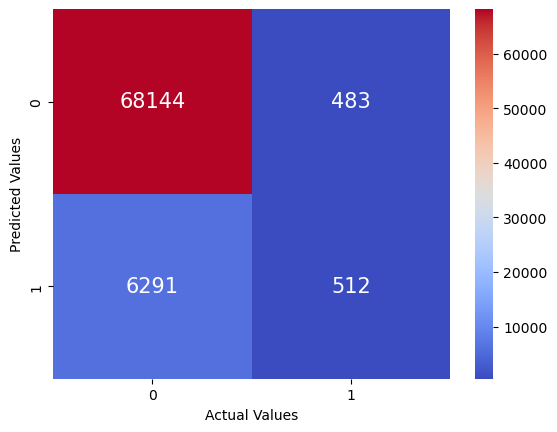

In [45]:
#plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,logreg_cv.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    # neigh.fit(X_train, Y_train)
    neigh.fit(X_train,y_train)
    predict = neigh.predict(X_test)
    print("classification report of k= ", i)
    print(classification_report(predict,y_test))

classification report of k=  1
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     68787
           1       0.21      0.22      0.22      6643

    accuracy                           0.86     75430
   macro avg       0.57      0.57      0.57     75430
weighted avg       0.86      0.86      0.86     75430

classification report of k=  2
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     74102
           1       0.06      0.31      0.10      1328

    accuracy                           0.90     75430
   macro avg       0.52      0.61      0.53     75430
weighted avg       0.97      0.90      0.93     75430

classification report of k=  3
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     72272
           1       0.14      0.30      0.19      3158

    accuracy                           0.89     75430
   macro avg       0.55      0.61  

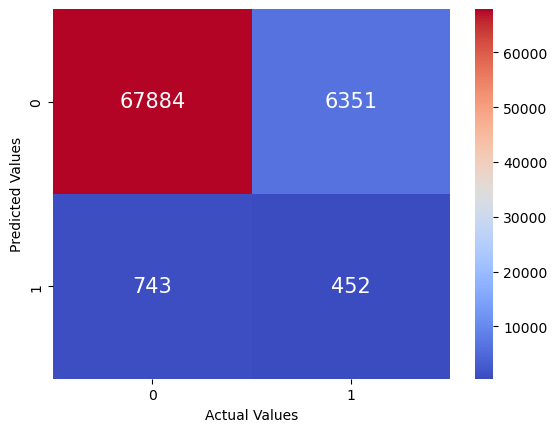

In [47]:

cf_matrix = confusion_matrix(predict, y_test)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [48]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
neigh_acc = accuracy_score(y_test, neigh.predict(X_test))
neigh_f1 = f1_score(y_test, neigh.predict(X_test), average='macro')
neigh_precision = precision_score(y_test, neigh.predict(X_test), average='macro')
neigh_recall = recall_score(y_test, neigh.predict(X_test), average='macro')
neigh_mcc = matthews_corrcoef(y_test, neigh.predict(X_test))

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
param_grid = { 
    #'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [50]:
print(CV_dt.best_params_)
accuracy = CV_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 91.05%


In [51]:
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 'sqrt')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
dt_f1 = f1_score(y_test, dt.predict(X_test), average='macro')
dt_precision = precision_score(y_test, dt.predict(X_test), average='macro')
dt_recall = recall_score(y_test, dt.predict(X_test), average='macro')
dt_mcc = matthews_corrcoef(y_test, dt.predict(X_test))

In [52]:
print(classification_report(y_test,CV_dt.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     68627
           1       0.51      0.06      0.10      6803

    accuracy                           0.91     75430
   macro avg       0.71      0.53      0.53     75430
weighted avg       0.88      0.91      0.88     75430



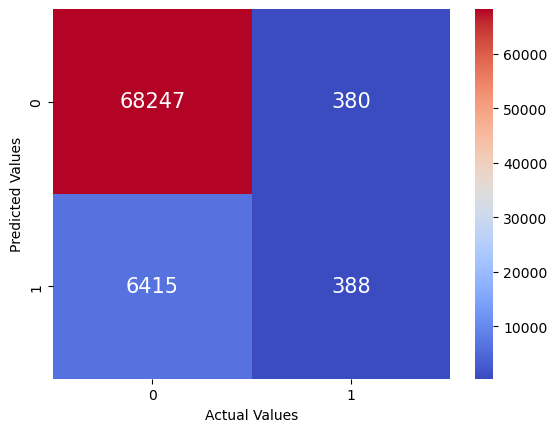

In [53]:
cf_matrix = confusion_matrix(y_test,CV_dt.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## SGD

In [54]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}
grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [55]:
# best parameter 

grid_search.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}

In [56]:
sgd = SGDClassifier(alpha = 0.001, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



SGDClassifier(alpha=0.001, loss='log')

In [57]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 91.05%


In [58]:
# model predictions 
y_pred = sgd.predict(X_test)

In [59]:
# accuracy score

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
sgd_f1 = f1_score(y_test, sgd.predict(X_test), average='macro')
sgd_precision = precision_score(y_test, sgd.predict(X_test), average='macro')
sgd_recall = recall_score(y_test, sgd.predict(X_test), average='macro')
sgd_mcc = matthews_corrcoef(y_test, sgd.predict(X_test))
print(sgd_acc)

0.9105074529248256
0.9101816253480047


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.51      0.07      0.13      6803

    accuracy                           0.91     75430
   macro avg       0.71      0.53      0.54     75430
weighted avg       0.88      0.91      0.88     75430



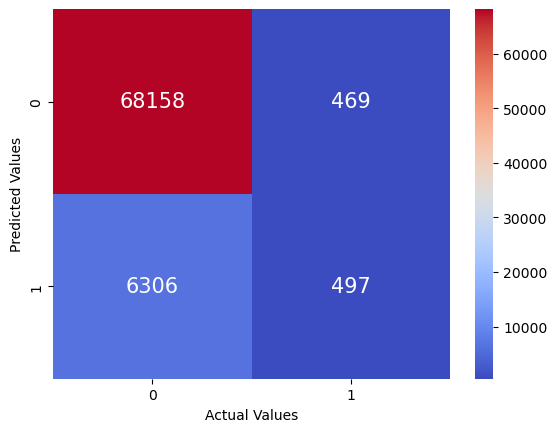

In [61]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## ADA Boost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt)

ada = AdaBoostClassifier(dt, n_estimators = 180)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    max_features='sqrt',
                                                    random_state=42),
                   n_estimators=180)

In [63]:
y_pred = ada.predict(X_test)

In [64]:
# accuracy score

print(accuracy_score(y_train, ada.predict(X_train)))

ada_acc = accuracy_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred, average='macro')
ada_precision = precision_score(y_test, y_pred, average='macro')
ada_recall = recall_score(y_test, y_pred, average='macro')
ada_mcc = matthews_corrcoef(y_test, y_pred)
print(ada_acc)

0.9244676008785304
0.9017499668566883


In [65]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68627
           1       0.37      0.13      0.19      6803

    accuracy                           0.90     75430
   macro avg       0.64      0.55      0.57     75430
weighted avg       0.87      0.90      0.88     75430



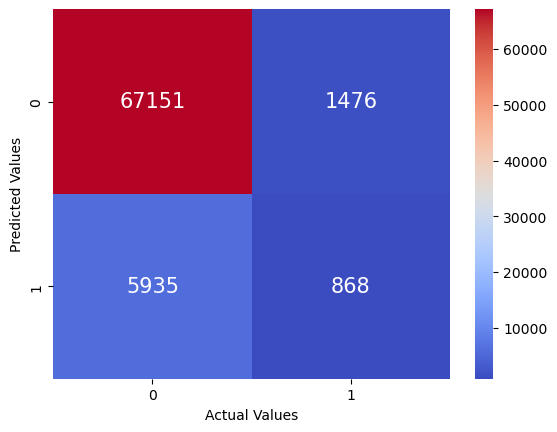

In [66]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## GBM

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [68]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 180}

In [69]:
# best score

grid_search_gbc.best_score_

0.9117006283047784

In [70]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GradientBoostingClassifier(loss='deviance', n_estimators=180)

In [71]:
y_pred = gbc.predict(X_test)

In [72]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
gbc_f1 = f1_score(y_test, y_pred, average='macro')
gbc_precision = precision_score(y_test, y_pred, average='macro')
gbc_recall = recall_score(y_test, y_pred, average='macro')
gbc_mcc = matthews_corrcoef(y_test, y_pred)
print(gbc_acc)

0.9124739821554044
0.911268725971099


In [73]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.55      0.09      0.16      6803

    accuracy                           0.91     75430
   macro avg       0.73      0.54      0.56     75430
weighted avg       0.88      0.91      0.88     75430



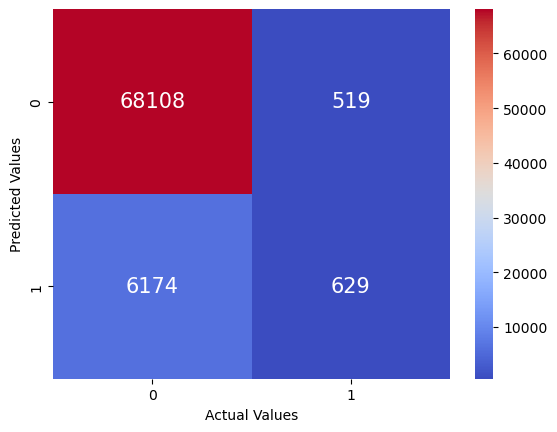

In [74]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## XG Boost

In [75]:
f=y_train.astype(int)

In [76]:
f

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
from xgboost import XGBClassifier
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

XGB_model = XGBClassifier(seed=42)
xgbcv=GridSearchCV(estimator=XGB_model,param_grid=params,cv=5)
xgbcv.fit(X_train, f)

print(xgbcv.best_params_)
accuracy = xgbcv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'learning_rate': 0.05, 'n_estimators': 100}
Accuracy for our training dataset with tuning is : 91.16%


In [78]:
f2=y_test.astype(int)
f2

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
print(classification_report(f2,xgbcv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.59      0.07      0.13      6803

    accuracy                           0.91     75430
   macro avg       0.75      0.53      0.54     75430
weighted avg       0.89      0.91      0.88     75430



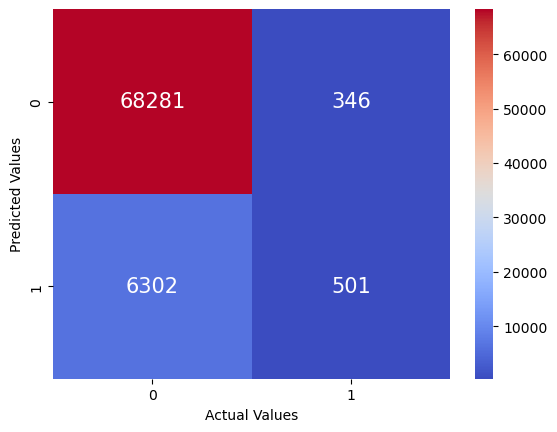

In [80]:
cf_matrix = confusion_matrix(f2,xgbcv.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [81]:
xgb = XGBClassifier(seed=42,learning_rate= 0.05, n_estimators= 100)
xgb.fit(X_train, f)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(f2, xgb.predict(X_test))
xgb_f1 = f1_score(f2, xgb.predict(X_test), average='macro')
xgb_precision = precision_score(f2, xgb.predict(X_test), average='macro')
xgb_recall = recall_score(f2, xgb.predict(X_test), average='macro')
xgb_mcc = matthews_corrcoef(f2, xgb.predict(X_test))

## Stochastic Gradient Boost

In [82]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)
sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [83]:
y_pred = sgbc.predict(X_test)

In [84]:
# accuracy score

print(accuracy_score(y_train, sgbc.predict(X_train)))

sgbc_acc = accuracy_score(y_test, y_pred)
sgbc_f1 = f1_score(y_test, y_pred, average='macro')
sgbc_precision = precision_score(y_test, y_pred, average='macro')
sgbc_recall = recall_score(y_test, y_pred, average='macro')
sgbc_mcc = matthews_corrcoef(y_test, y_pred)
print(sgbc_acc)

0.9134241030196166
0.9108710062309426


In [85]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.54      0.09      0.15      6803

    accuracy                           0.91     75430
   macro avg       0.73      0.54      0.55     75430
weighted avg       0.88      0.91      0.88     75430



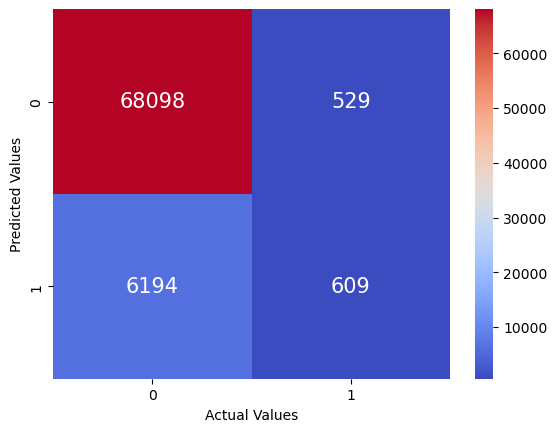

In [86]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## CAT Boost

In [87]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4261075	total: 191ms	remaining: 18.9s
1:	learn: 0.3297669	total: 234ms	remaining: 11.5s
2:	learn: 0.2835903	total: 269ms	remaining: 8.71s
3:	learn: 0.2618399	total: 297ms	remaining: 7.14s
4:	learn: 0.2499505	total: 329ms	remaining: 6.25s
5:	learn: 0.2442794	total: 378ms	remaining: 5.92s
6:	learn: 0.2401024	total: 409ms	remaining: 5.43s
7:	learn: 0.2377824	total: 439ms	remaining: 5.05s
8:	learn: 0.2364591	total: 456ms	remaining: 4.61s
9:	learn: 0.2360070	total: 487ms	remaining: 4.38s
10:	learn: 0.2349589	total: 519ms	remaining: 4.2s
11:	learn: 0.2345863	total: 538ms	remaining: 3.94s
12:	learn: 0.2343699	total: 566ms	remaining: 3.79s
13:	learn: 0.2340122	total: 597ms	remaining: 3.66s
14:	learn: 0.2338334	total: 613ms	remaining: 3.47s
15:	learn: 0.2336392	total: 629ms	remaining: 3.3s
16:	learn: 0.2334494	total: 658ms	remaining: 3.21s
17:	learn: 0.2332836	total: 675ms	remaining: 3.07s
18:	learn: 0.2331378	total: 708ms	remaining: 3.02s
19:	learn: 0.23296

In [88]:
y_pred_cat = cat.predict(X_test)

In [89]:
print(accuracy_score(y_train, cat.predict(X_train)))
acc_cat = accuracy_score(y_test, y_pred_cat)
cat_f1 = f1_score(y_test, y_pred_cat, average='macro')
cat_precision = precision_score(y_test, y_pred_cat, average='macro')
cat_recall = recall_score(y_test, y_pred_cat, average='macro')
cat_mcc = matthews_corrcoef(y_test, y_pred_cat)
print(acc_cat)

0.9151343205751987
0.9105395731141456


In [90]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.52      0.09      0.16      6803

    accuracy                           0.91     75430
   macro avg       0.72      0.54      0.55     75430
weighted avg       0.88      0.91      0.88     75430



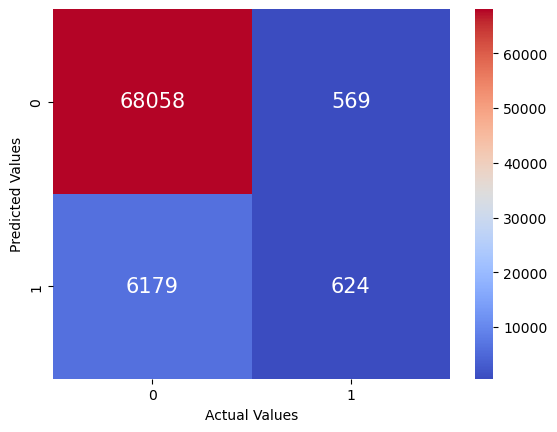

In [91]:
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Light Gradient Boost

In [92]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 20458, number of negative: 205829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 226287, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090407 -> initscore=-2.308672
[LightGBM] [Info] Start training from score -2.308672


LGBMClassifier(learning_rate=1)

In [93]:
y_pred_lgbm = lgbm.predict(X_test)

## Extra Trees Classifier

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier()

In [95]:
y_pred_etc = etc.predict(X_test)

In [96]:
print(accuracy_score(y_train, etc.predict(X_train)))
etc_acc = accuracy_score(y_test, y_pred_etc)
etc_f1 = f1_score(y_test, y_pred_etc, average='macro')
etc_precision = precision_score(y_test, y_pred_etc, average='macro')
etc_recall = recall_score(y_test, y_pred_etc, average='macro')
etc_mcc = matthews_corrcoef(y_test, y_pred_etc)
print(etc_acc)

0.9973219849129645
0.8884396128861196


In [97]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68627
           1       0.28      0.15      0.19      6803

    accuracy                           0.89     75430
   macro avg       0.60      0.55      0.57     75430
weighted avg       0.86      0.89      0.87     75430



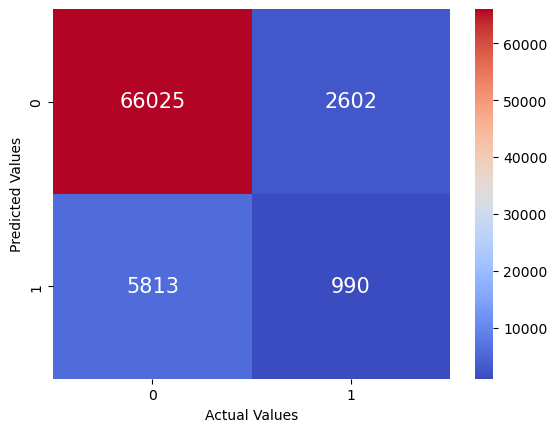

In [98]:
cf_matrix = confusion_matrix(y_test, y_pred_etc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Linear Discriminant Analysis

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [100]:
y_pred_lda = lda.predict(X_test)

In [101]:
print(accuracy_score(y_train, lda.predict(X_train)))
lda_acc = accuracy_score(y_test, y_pred_lda)
lda_f1 = f1_score(y_test, y_pred_lda, average='macro')
lda_precision = precision_score(y_test, y_pred_lda, average='macro')
lda_recall = recall_score(y_test, y_pred_lda, average='macro')
lda_mcc = matthews_corrcoef(y_test, y_pred_lda)
print(lda_acc)

0.9037859002063751
0.9036987935834548


In [102]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     68627
           1       0.43      0.20      0.27      6803

    accuracy                           0.90     75430
   macro avg       0.68      0.58      0.61     75430
weighted avg       0.88      0.90      0.89     75430



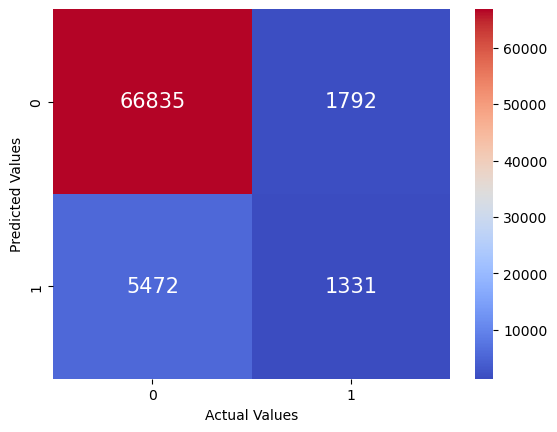

In [103]:
cf_matrix = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [105]:
y_pred_gnb = gnb.predict(X_test)

In [106]:
print(accuracy_score(y_train, gnb.predict(X_train)))
gnb_acc = accuracy_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb, average='macro')
gnb_precision = precision_score(y_test, y_pred_gnb, average='macro')
gnb_recall = recall_score(y_test, y_pred_gnb, average='macro')
gnb_mcc = matthews_corrcoef(y_test, y_pred_gnb)
print(gnb_acc)

0.8419308223627517
0.8407927880153785


In [107]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     68627
           1       0.27      0.44      0.33      6803

    accuracy                           0.84     75430
   macro avg       0.60      0.66      0.62     75430
weighted avg       0.88      0.84      0.86     75430



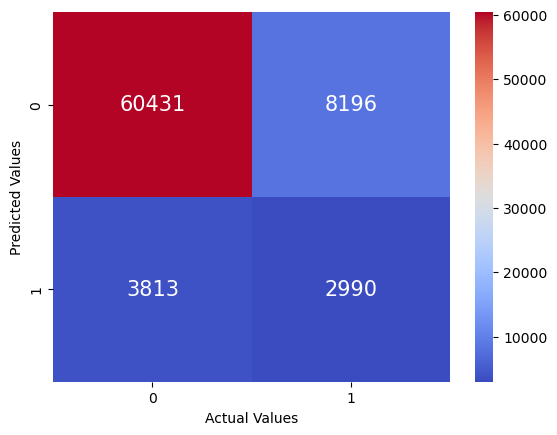

In [108]:
cf_matrix = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### SVM

from sklearn.svm import SVC
param_grid = {'C': [0.0001,0.001,0.01,0.1, 1, 10, 100, 1000], 
              'gamma': [100,10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid','poly','precomputer']}
grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)

## Voting Classifier

In [109]:
cat = CatBoostClassifier()
sgbc = GradientBoostingClassifier()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()

In [110]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Cat Boost Classifier', cat), ('Gradient Boost', gbc), ('XGB Classifier', xgb),
               ('Stochastic Gradient Boost', sgbc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

Learning rate set to 0.104321
0:	learn: 0.5726365	total: 46.1ms	remaining: 46.1s
1:	learn: 0.4862100	total: 78.2ms	remaining: 39s
2:	learn: 0.4273916	total: 107ms	remaining: 35.4s
3:	learn: 0.3821858	total: 136ms	remaining: 33.8s
4:	learn: 0.3515136	total: 169ms	remaining: 33.6s
5:	learn: 0.3250255	total: 200ms	remaining: 33.1s
6:	learn: 0.3082976	total: 231ms	remaining: 32.8s
7:	learn: 0.2923502	total: 268ms	remaining: 33.2s
8:	learn: 0.2816344	total: 314ms	remaining: 34.6s
9:	learn: 0.2723331	total: 347ms	remaining: 34.4s
10:	learn: 0.2651315	total: 392ms	remaining: 35.2s
11:	learn: 0.2601774	total: 440ms	remaining: 36.3s
12:	learn: 0.2550522	total: 502ms	remaining: 38.1s
13:	learn: 0.2520599	total: 550ms	remaining: 38.7s
14:	learn: 0.2492076	total: 582ms	remaining: 38.2s
15:	learn: 0.2474700	total: 629ms	remaining: 38.7s
16:	learn: 0.2459121	total: 673ms	remaining: 38.9s
17:	learn: 0.2440644	total: 717ms	remaining: 39.1s
18:	learn: 0.2428345	total: 750ms	remaining: 38.7s
19:	learn: 

162:	learn: 0.2298370	total: 6.64s	remaining: 34.1s
163:	learn: 0.2298127	total: 6.69s	remaining: 34.1s
164:	learn: 0.2297875	total: 6.72s	remaining: 34s
165:	learn: 0.2297642	total: 6.77s	remaining: 34s
166:	learn: 0.2297285	total: 6.81s	remaining: 34s
167:	learn: 0.2297100	total: 6.85s	remaining: 33.9s
168:	learn: 0.2296864	total: 6.9s	remaining: 33.9s
169:	learn: 0.2296607	total: 6.93s	remaining: 33.8s
170:	learn: 0.2296198	total: 6.97s	remaining: 33.8s
171:	learn: 0.2295921	total: 7.01s	remaining: 33.8s
172:	learn: 0.2295687	total: 7.05s	remaining: 33.7s
173:	learn: 0.2295468	total: 7.09s	remaining: 33.6s
174:	learn: 0.2295206	total: 7.12s	remaining: 33.6s
175:	learn: 0.2294967	total: 7.16s	remaining: 33.5s
176:	learn: 0.2294620	total: 7.19s	remaining: 33.4s
177:	learn: 0.2294400	total: 7.25s	remaining: 33.5s
178:	learn: 0.2294026	total: 7.28s	remaining: 33.4s
179:	learn: 0.2293797	total: 7.32s	remaining: 33.4s
180:	learn: 0.2293547	total: 7.36s	remaining: 33.3s
181:	learn: 0.22932

322:	learn: 0.2260397	total: 13.3s	remaining: 27.9s
323:	learn: 0.2260131	total: 13.4s	remaining: 27.9s
324:	learn: 0.2259864	total: 13.4s	remaining: 27.8s
325:	learn: 0.2259747	total: 13.4s	remaining: 27.8s
326:	learn: 0.2259494	total: 13.5s	remaining: 27.8s
327:	learn: 0.2259242	total: 13.5s	remaining: 27.7s
328:	learn: 0.2259085	total: 13.6s	remaining: 27.6s
329:	learn: 0.2258921	total: 13.6s	remaining: 27.6s
330:	learn: 0.2258663	total: 13.6s	remaining: 27.6s
331:	learn: 0.2258439	total: 13.7s	remaining: 27.5s
332:	learn: 0.2258254	total: 13.7s	remaining: 27.5s
333:	learn: 0.2258033	total: 13.8s	remaining: 27.5s
334:	learn: 0.2257811	total: 13.8s	remaining: 27.4s
335:	learn: 0.2257572	total: 13.9s	remaining: 27.4s
336:	learn: 0.2257238	total: 13.9s	remaining: 27.3s
337:	learn: 0.2256955	total: 13.9s	remaining: 27.3s
338:	learn: 0.2256759	total: 14s	remaining: 27.2s
339:	learn: 0.2256584	total: 14s	remaining: 27.2s
340:	learn: 0.2256229	total: 14s	remaining: 27.1s
341:	learn: 0.2256

483:	learn: 0.2228363	total: 19.9s	remaining: 21.3s
484:	learn: 0.2228203	total: 20s	remaining: 21.2s
485:	learn: 0.2227976	total: 20s	remaining: 21.2s
486:	learn: 0.2227761	total: 20.1s	remaining: 21.1s
487:	learn: 0.2227584	total: 20.1s	remaining: 21.1s
488:	learn: 0.2227457	total: 20.2s	remaining: 21.1s
489:	learn: 0.2227306	total: 20.2s	remaining: 21s
490:	learn: 0.2227107	total: 20.2s	remaining: 21s
491:	learn: 0.2226962	total: 20.3s	remaining: 20.9s
492:	learn: 0.2226819	total: 20.3s	remaining: 20.9s
493:	learn: 0.2226625	total: 20.4s	remaining: 20.9s
494:	learn: 0.2226458	total: 20.4s	remaining: 20.8s
495:	learn: 0.2226135	total: 20.4s	remaining: 20.8s
496:	learn: 0.2225876	total: 20.5s	remaining: 20.7s
497:	learn: 0.2225703	total: 20.5s	remaining: 20.7s
498:	learn: 0.2225513	total: 20.6s	remaining: 20.7s
499:	learn: 0.2225391	total: 20.6s	remaining: 20.6s
500:	learn: 0.2225272	total: 20.6s	remaining: 20.6s
501:	learn: 0.2225088	total: 20.7s	remaining: 20.5s
502:	learn: 0.222488

647:	learn: 0.2200509	total: 27s	remaining: 14.7s
648:	learn: 0.2200335	total: 27.1s	remaining: 14.6s
649:	learn: 0.2200187	total: 27.1s	remaining: 14.6s
650:	learn: 0.2200119	total: 27.1s	remaining: 14.5s
651:	learn: 0.2199953	total: 27.2s	remaining: 14.5s
652:	learn: 0.2199835	total: 27.2s	remaining: 14.5s
653:	learn: 0.2199675	total: 27.3s	remaining: 14.4s
654:	learn: 0.2199477	total: 27.3s	remaining: 14.4s
655:	learn: 0.2199325	total: 27.4s	remaining: 14.3s
656:	learn: 0.2199137	total: 27.4s	remaining: 14.3s
657:	learn: 0.2198947	total: 27.4s	remaining: 14.3s
658:	learn: 0.2198705	total: 27.5s	remaining: 14.2s
659:	learn: 0.2198543	total: 27.5s	remaining: 14.2s
660:	learn: 0.2198408	total: 27.5s	remaining: 14.1s
661:	learn: 0.2198264	total: 27.6s	remaining: 14.1s
662:	learn: 0.2198129	total: 27.6s	remaining: 14s
663:	learn: 0.2197960	total: 27.7s	remaining: 14s
664:	learn: 0.2197765	total: 27.7s	remaining: 14s
665:	learn: 0.2197566	total: 27.7s	remaining: 13.9s
666:	learn: 0.219727

810:	learn: 0.2175810	total: 33.8s	remaining: 7.88s
811:	learn: 0.2175610	total: 33.9s	remaining: 7.84s
812:	learn: 0.2175358	total: 33.9s	remaining: 7.8s
813:	learn: 0.2175228	total: 34s	remaining: 7.76s
814:	learn: 0.2175055	total: 34s	remaining: 7.72s
815:	learn: 0.2174959	total: 34s	remaining: 7.68s
816:	learn: 0.2174719	total: 34.1s	remaining: 7.63s
817:	learn: 0.2174519	total: 34.1s	remaining: 7.59s
818:	learn: 0.2174347	total: 34.2s	remaining: 7.55s
819:	learn: 0.2174243	total: 34.2s	remaining: 7.51s
820:	learn: 0.2174139	total: 34.2s	remaining: 7.47s
821:	learn: 0.2174027	total: 34.3s	remaining: 7.42s
822:	learn: 0.2173914	total: 34.3s	remaining: 7.38s
823:	learn: 0.2173726	total: 34.4s	remaining: 7.34s
824:	learn: 0.2173551	total: 34.4s	remaining: 7.29s
825:	learn: 0.2173403	total: 34.4s	remaining: 7.25s
826:	learn: 0.2173231	total: 34.5s	remaining: 7.21s
827:	learn: 0.2173030	total: 34.5s	remaining: 7.17s
828:	learn: 0.2172873	total: 34.6s	remaining: 7.13s
829:	learn: 0.21727

970:	learn: 0.2152391	total: 40.6s	remaining: 1.21s
971:	learn: 0.2152280	total: 40.6s	remaining: 1.17s
972:	learn: 0.2152193	total: 40.7s	remaining: 1.13s
973:	learn: 0.2152108	total: 40.7s	remaining: 1.09s
974:	learn: 0.2152001	total: 40.8s	remaining: 1.04s
975:	learn: 0.2151909	total: 40.8s	remaining: 1s
976:	learn: 0.2151783	total: 40.9s	remaining: 962ms
977:	learn: 0.2151621	total: 40.9s	remaining: 920ms
978:	learn: 0.2151479	total: 40.9s	remaining: 878ms
979:	learn: 0.2151389	total: 41s	remaining: 836ms
980:	learn: 0.2151225	total: 41s	remaining: 795ms
981:	learn: 0.2151081	total: 41.1s	remaining: 753ms
982:	learn: 0.2150941	total: 41.1s	remaining: 711ms
983:	learn: 0.2150714	total: 41.1s	remaining: 669ms
984:	learn: 0.2150516	total: 41.2s	remaining: 627ms
985:	learn: 0.2150372	total: 41.2s	remaining: 585ms
986:	learn: 0.2150245	total: 41.3s	remaining: 544ms
987:	learn: 0.2150099	total: 41.3s	remaining: 502ms
988:	learn: 0.2149992	total: 41.3s	remaining: 460ms
989:	learn: 0.21498

VotingClassifier(estimators=[('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000002728AFB9900>),
                             ('Gradient Boost', GradientBoostingClassifier()),
                             ('XGB Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_ca...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Stochastic Gradient Boost',
                              GradientBoostingClassifier())])

In [111]:
y_pred = vc.predict(X_test)

In [112]:
# accuracy score

print(accuracy_score(y_train, vc.predict(X_train)))

vc_acc = accuracy_score(y_test, y_pred)
vc_f1 = f1_score(y_test, y_pred, average='macro')
vc_precision = precision_score(y_test, y_pred, average='macro')
vc_recall = recall_score(y_test, y_pred, average='macro')
vc_mcc = matthews_corrcoef(y_test, y_pred)
print(vc_acc)

0.9138041513653016
0.9115338724645367


In [113]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.57      0.07      0.13      6803

    accuracy                           0.91     75430
   macro avg       0.74      0.53      0.54     75430
weighted avg       0.88      0.91      0.88     75430



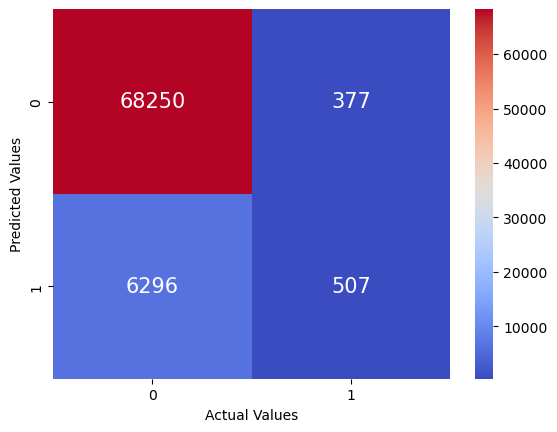

In [114]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Blender Model

In [115]:
# Train some base models
#base_model_1
base_model_1 = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
base_model_1.fit(X_train, y_train)

#base_model_2
base_model_2 = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)
base_model_2.fit(X_train, y_train)

# Generate predictions from base models
preds_model_1 = base_model_1.predict(X_test)
preds_model_2 = base_model_2.predict(X_test)

# Combine predictions (simple averaging for demonstration purposes) # Soft Voting
blender_input = (preds_model_1 + preds_model_2) / 2

# Train the blender model
blender_model = XGBClassifier(learning_rate= 0.05, n_estimators= 100,seed=42) #LogisticRegression(max_iter=1000)
blender_model.fit(blender_input.reshape(-1, 1), y_test)

# Use blender model for final predictions
blender_preds = blender_model.predict(blender_input.reshape(-1, 1))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



In [116]:
# Calculate accuracy
blender_acc = accuracy_score(y_test, blender_preds)
blender_f1 = f1_score(y_test, blender_preds, average='macro')
blender_precision = precision_score(y_test, blender_preds, average='macro')
blender_recall = recall_score(y_test, blender_preds, average='macro')
blender_mcc = matthews_corrcoef(y_test, blender_preds)
print(f'Accuracy: {blender_acc}')

Accuracy: 0.9112024393477396


In [117]:
print(classification_report(y_test, blender_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.55      0.08      0.14      6803

    accuracy                           0.91     75430
   macro avg       0.74      0.54      0.55     75430
weighted avg       0.88      0.91      0.88     75430



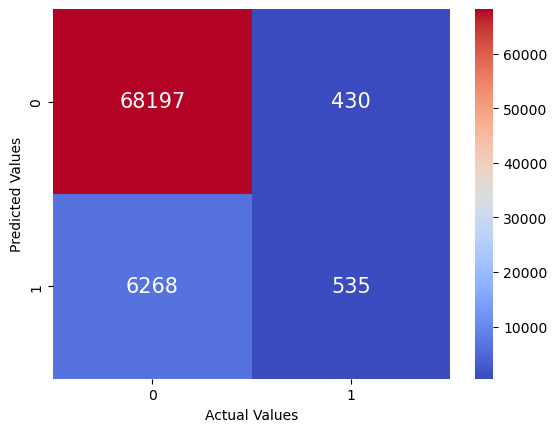

In [118]:
cf_matrix = confusion_matrix(y_test, blender_preds)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Stacker Model

## TABLE

In [119]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XgBoost',
              'SGD Classifier','Ada Boost Classifier','Gradient Boosting Classifier',
              'Stochastic Gradient Boosting','CAT Boost', 'Extra Trees Classifier',
              'Linear Discriminant Analysis','Naive Bayes Classifier','Voting Classifier','Blender Model'],
    'Accuracy': [log_reg_acc,rf_acc,dt_acc,xgb_acc,sgd_acc,ada_acc,gbc_acc,sgbc_acc,acc_cat,
                 etc_acc,lda_acc,gnb_acc,vc_acc,blender_acc],
    'F1-Score': [log_reg_f1,rf_f1,dt_f1,xgb_f1,sgd_f1,ada_f1,gbc_f1,sgbc_f1,cat_f1,
                 etc_f1,lda_f1,gnb_f1,vc_f1,blender_f1],
    'Precision': [log_reg_precision,rf_precision,dt_precision,xgb_precision,sgd_precision,
                  ada_precision,gbc_precision,sgbc_precision,cat_precision,etc_precision,
                  lda_precision,gnb_precision,vc_precision,blender_precision],
    'Recall':[log_reg_recall,rf_recall,dt_recall,xgb_recall,sgd_recall,
                  ada_recall,gbc_recall,sgbc_recall,cat_recall,etc_recall,
                  lda_recall,gnb_recall,vc_recall,blender_recall],
    'MCC': [log_reg_mcc,rf_mcc,dt_mcc,xgb_mcc,sgd_mcc,ada_mcc,gbc_mcc,sgbc_mcc,cat_mcc,
            etc_mcc,lda_mcc,gnb_mcc,vc_mcc,blender_mcc],
})
models.sort_values(by = 'F1-Score', ascending = False)

Model  Accuracy  F1-Score  Precision    Recall  \
11        Naive Bayes Classifier  0.840793  0.621022   0.603973  0.660042   
10  Linear Discriminant Analysis  0.903699  0.608321   0.675258  0.584768   
5           Ada Boost Classifier  0.901750  0.568747   0.644551  0.553042   
9         Extra Trees Classifier  0.888440  0.565284   0.597347  0.553804   
6   Gradient Boosting Classifier  0.911269  0.555693   0.732397  0.542448   
8                      CAT Boost  0.910540  0.554422   0.719909  0.541717   
7   Stochastic Gradient Boosting  0.910871  0.553170   0.725888  0.540905   
13                 Blender Model  0.911202  0.545468   0.735115  0.536188   
12             Voting Classifier  0.911534  0.542652   0.744536  0.534516   
3                        XgBoost  0.911865  0.542280   0.753501  0.534301   
0            Logistic Regression  0.910195  0.541983   0.715028  0.534111   
4                 SGD Classifier  0.910182  0.540298   0.714904  0.533111   
2       Decision Tree Classifier  0.909916  0.527537   0.709644  0.525748   
1       Random Forest Classifier  0.910182  0.482024   0.850962  0.502720   

         MCC  
11  0.257993  
10  0.243773  
5   0.175125  
9   0.144744  
6   0.198644  
8   0.191560  
7   0.192250  
13  0.184481  
12  0.183744  
3   0.186498  
0   0.171288  
4   0.168709  
2   0.146942  
1   0.061794

In [120]:
X_test

array([[ 1.07208388,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05111402,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.21231979,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10222805,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03931848,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.59764089,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## Problem with imbalanced data

#### As we can see accuracy of all models is around 90%
#### The ratio of the number of correct predictions to the total number of input samples is called accuracy. It is easy to calculate and interpret , making it the most common metric used for evaluating classifier models. So, it is natural to use it on imbalanced classification problems, but this is the most common mistake made by beginners to imbalanced classification.When the class distribution is slightly skewed, accuracy can still be a useful metric. When the skew in the class distributions are severe, accuracy can become an unreliable measure of model performance.Consider the case of an imbalanced dataset with a 1:100 class imbalance. Blind guess will give us a 99% accuracy score (by betting on majority class).

### So metrics like F1-score, precision and recall are better measures

#### Precision is calculated as the ratio of True Positives ( TP) to the sum of True Positives ( TP) and False Positives ( FP)

#### Recall is calculated as the ratio of True Positives ( TP) to the sum of True Positives ( TP) and False Negatives ( FN)

#### Area Under the ROC Curve: A higher AUC value indicates a better ability of the model to correctly classify positive and negative cases.

#### The F1 Score is a metric that combines both precision and recall. It is defined as the harmonic mean of precision and recall.

# Oversampling to handle imbalanced dataset

#### Over-sampling increases the number of minority class members in the training set. The advantage of over-sampling is that no information from the original training set is lost, as all observations from the minority and majority classes are kept. On the other hand, it is prone to over fitting.

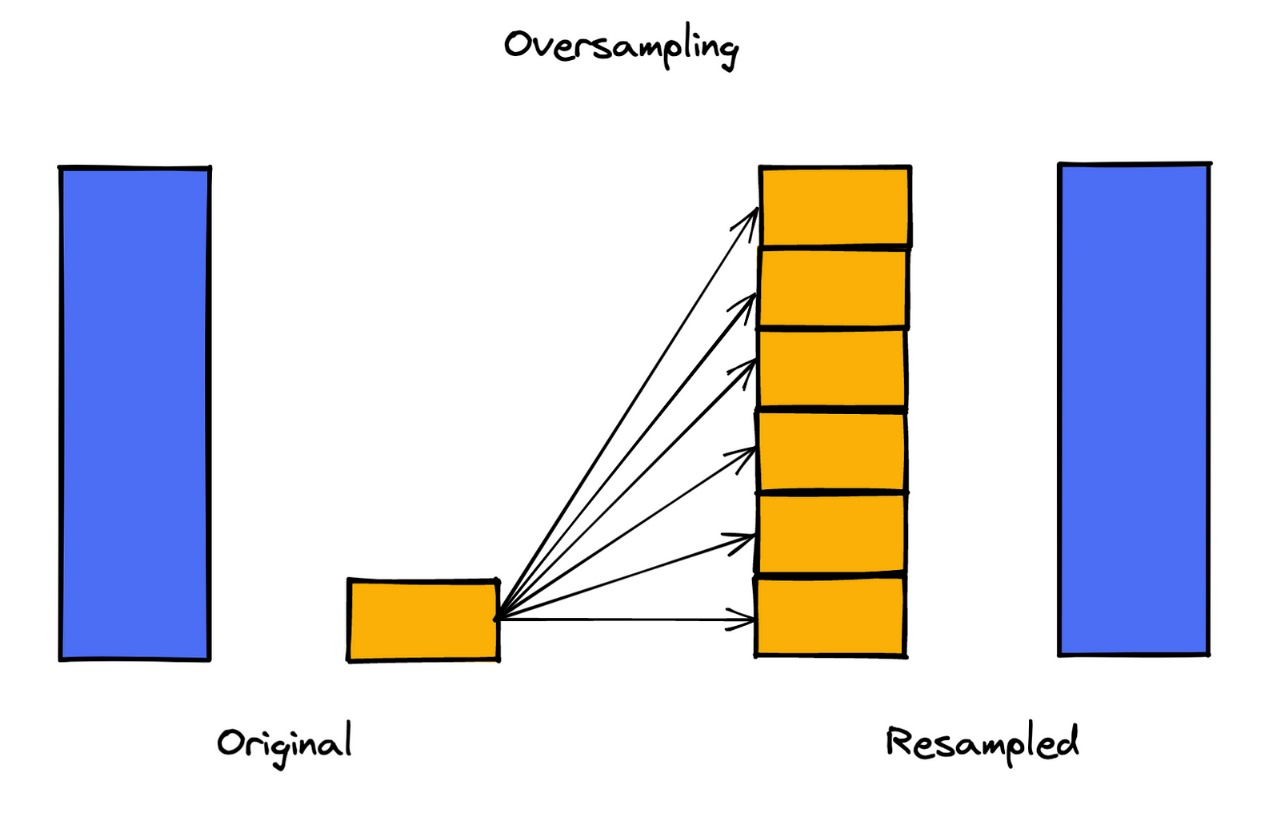

## 1) Random Oversampling

In [121]:
data3 = data1.copy()
X = data3.drop(["HeartDisease"] , axis = 1).values
y = data3["HeartDisease"].values

In [122]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [123]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.25, random_state=42)

In [124]:
ro_scaler = RobustScaler()
X_train1 = ro_scaler.fit_transform(X_train1)
X_test1 = ro_scaler.fit_transform(X_test1)

#### Naive Bayes Classifier

In [125]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train1, y_train1)

GaussianNB()

In [126]:
y_pred_gnb = gnb.predict(X_test1)

In [127]:
print(accuracy_score(y_train1, gnb.predict(X_train1)))
gnb_acc_ros = accuracy_score(y_test1, y_pred_gnb)
gnb_f1_ros = f1_score(y_test1, y_pred_gnb, average='macro')
gnb_precision_ros = precision_score(y_test1, y_pred_gnb, average='macro')
gnb_recall_ros = recall_score(y_test1, y_pred_gnb, average='macro')
gnb_mcc_ros = matthews_corrcoef(y_test1, y_pred_gnb)
print(gnb_acc_ros)

0.7021890576267235
0.700731629113592


In [128]:
print(classification_report(y_test1, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73     68436
           1       0.76      0.60      0.67     68792

    accuracy                           0.70    137228
   macro avg       0.71      0.70      0.70    137228
weighted avg       0.71      0.70      0.70    137228



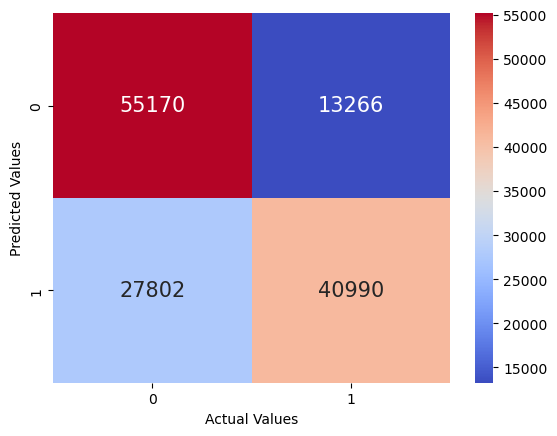

In [129]:
cf_matrix = confusion_matrix(y_test1, y_pred_gnb)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Linear Discriminant Analysis

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train1,y_train1)

LinearDiscriminantAnalysis()

In [131]:
y_pred_lda = lda.predict(X_test1)

In [132]:
print(accuracy_score(y_train1, lda.predict(X_train1)))
lda_acc_ros = accuracy_score(y_test1, y_pred_lda)
lda_f1_ros = f1_score(y_test1, y_pred_lda, average='macro')
lda_precision_ros = precision_score(y_test1, y_pred_lda, average='macro')
lda_recall_ros = recall_score(y_test1, y_pred_lda, average='macro')
lda_mcc_ros = matthews_corrcoef(y_test1, y_pred_lda)
print(lda_acc)

0.7479887486518786
0.9036987935834548


In [133]:
print(classification_report(y_test1, y_pred_lda))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     68436
           1       0.74      0.77      0.75     68792

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



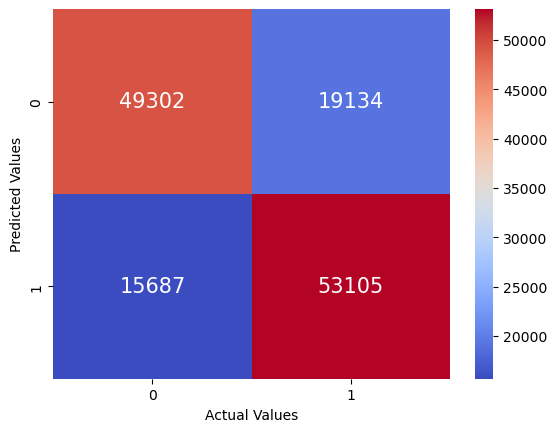

In [134]:
cf_matrix = confusion_matrix(y_test1, y_pred_lda)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### ADA Boost

In [136]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt)

ada = AdaBoostClassifier(dt, n_estimators = 180)
ada.fit(X_train1, y_train1)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    max_features='sqrt',
                                                    random_state=42),
                   n_estimators=180)

In [137]:
y_pred_ada = ada.predict(X_test1)

In [141]:
# accuracy score

print(accuracy_score(y_train1, ada.predict(X_train1)))

ada_acc_ros = accuracy_score(y_test1, y_pred_ada)
ada_f1_ros = f1_score(y_test1, y_pred_ada, average='macro')
ada_precision_ros = precision_score(y_test1, y_pred_ada, average='macro')
ada_recall_ros = recall_score(y_test1, y_pred_ada, average='macro')
ada_mcc_ros = matthews_corrcoef(y_test1, y_pred_ada)
print(ada_acc_ros)

0.8105391513879577
0.7835354300871542


In [142]:
# classification report

print(classification_report(y_test1, y_pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     68436
           1       0.77      0.80      0.79     68792

    accuracy                           0.78    137228
   macro avg       0.78      0.78      0.78    137228
weighted avg       0.78      0.78      0.78    137228



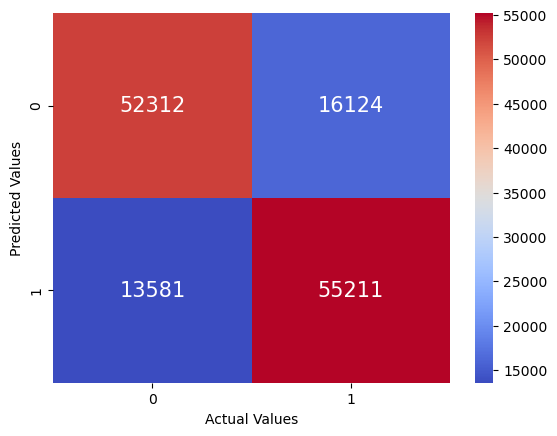

In [143]:
cf_matrix = confusion_matrix(y_test1, y_pred_ada)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Extra Trees Classifier

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train1, y_train1)

ExtraTreesClassifier()

In [145]:
y_pred_etc = etc.predict(X_test1)

In [146]:
print(accuracy_score(y_train1, etc.predict(X_train1)))
etc_acc_ros = accuracy_score(y_test1, y_pred_etc)
etc_f1_ros = f1_score(y_test1, y_pred_etc, average='macro')
etc_precision_ros = precision_score(y_test1, y_pred_etc, average='macro')
etc_recall_ros = recall_score(y_test1, y_pred_etc, average='macro')
etc_mcc_ros = matthews_corrcoef(y_test1, y_pred_etc)
print(etc_acc_ros)

0.9979328805588753
0.9571661759990673


In [147]:
print(classification_report(y_test1, y_pred_etc))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     68436
           1       0.95      0.97      0.96     68792

    accuracy                           0.96    137228
   macro avg       0.96      0.96      0.96    137228
weighted avg       0.96      0.96      0.96    137228



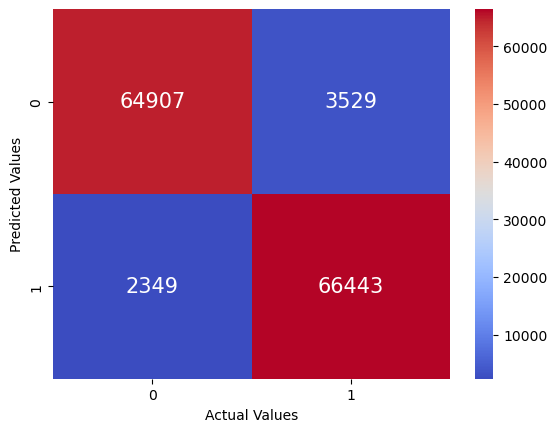

In [148]:
cf_matrix = confusion_matrix(y_test1, y_pred_etc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Gradient Boosting Classifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train1, y_train1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [150]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 200}

In [151]:
# best score

grid_search_gbc.best_score_

0.7703116979923272

In [152]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 200)
gbc.fit(X_train1, y_train1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GradientBoostingClassifier(learning_rate=1, loss='deviance', n_estimators=200)

In [153]:
y_pred_gbc = gbc.predict(X_test1)

In [154]:
# accuracy score

print(accuracy_score(y_train1, gbc.predict(X_train1)))

gbc_acc_ros = accuracy_score(y_test1, y_pred_gbc)
gbc_f1_ros = f1_score(y_test1, y_pred_gbc, average='macro')
gbc_precision_ros = precision_score(y_test1, y_pred_gbc, average='macro')
gbc_recall_ros = recall_score(y_test1, y_pred_gbc, average='macro')
gbc_mcc_ros = matthews_corrcoef(y_test1, y_pred_gbc)
print(gbc_acc_ros)

0.7753616851760088
0.7591745124901623


In [155]:
# classification report
print(classification_report(y_test1, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     68436
           1       0.75      0.78      0.77     68792

    accuracy                           0.76    137228
   macro avg       0.76      0.76      0.76    137228
weighted avg       0.76      0.76      0.76    137228



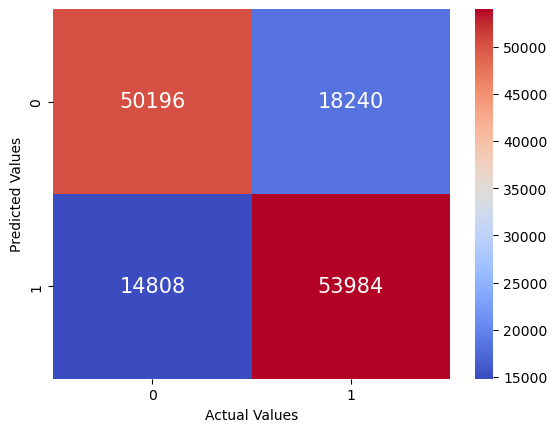

In [156]:
cf_matrix = confusion_matrix(y_test1, y_pred_gbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### CAT Boost

In [157]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train1, y_train1)

Learning rate set to 0.5
0:	learn: 0.5854652	total: 83.1ms	remaining: 8.23s
1:	learn: 0.5385761	total: 119ms	remaining: 5.85s
2:	learn: 0.5179526	total: 150ms	remaining: 4.86s
3:	learn: 0.5076566	total: 192ms	remaining: 4.6s
4:	learn: 0.5017000	total: 225ms	remaining: 4.27s
5:	learn: 0.4986798	total: 257ms	remaining: 4.02s
6:	learn: 0.4964619	total: 287ms	remaining: 3.81s
7:	learn: 0.4950831	total: 318ms	remaining: 3.66s
8:	learn: 0.4942636	total: 348ms	remaining: 3.52s
9:	learn: 0.4934568	total: 379ms	remaining: 3.41s
10:	learn: 0.4929189	total: 413ms	remaining: 3.34s
11:	learn: 0.4921330	total: 458ms	remaining: 3.36s
12:	learn: 0.4915751	total: 493ms	remaining: 3.3s
13:	learn: 0.4912125	total: 524ms	remaining: 3.22s
14:	learn: 0.4908098	total: 555ms	remaining: 3.15s
15:	learn: 0.4905225	total: 591ms	remaining: 3.1s
16:	learn: 0.4901526	total: 625ms	remaining: 3.05s
17:	learn: 0.4898605	total: 658ms	remaining: 3s
18:	learn: 0.4896179	total: 689ms	remaining: 2.94s
19:	learn: 0.4891911	

In [158]:
y_pred_cat = cat.predict(X_test1)

In [159]:
print(accuracy_score(y_train1, cat.predict(X_train1)))
acc_cat_ros = accuracy_score(y_test1, y_pred_cat)
cat_f1_ros = f1_score(y_test1, y_pred_cat, average='macro')
cat_precision_ros = precision_score(y_test1, y_pred_cat, average='macro')
cat_recall_ros = recall_score(y_test1, y_pred_cat, average='macro')
cat_mcc_ros = matthews_corrcoef(y_test1, y_pred_cat)
print(acc_cat_ros)

0.7750580542357731
0.771191010580931


In [160]:
print(classification_report(y_test1, y_pred_cat))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     68436
           1       0.75      0.81      0.78     68792

    accuracy                           0.77    137228
   macro avg       0.77      0.77      0.77    137228
weighted avg       0.77      0.77      0.77    137228



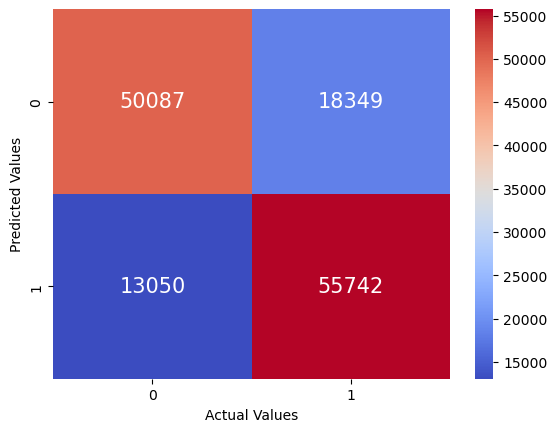

In [161]:
cf_matrix = confusion_matrix(y_test1, y_pred_cat)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Stochastic Gradient Boosting

In [162]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)
sgbc.fit(X_train1, y_train1)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [163]:
y_pred_sgbc = sgbc.predict(X_test1)

In [164]:
# accuracy score

print(accuracy_score(y_train1, sgbc.predict(X_train1)))

sgbc_acc_ros = accuracy_score(y_test1, y_pred_sgbc)
sgbc_f1_ros = f1_score(y_test1, y_pred_sgbc, average='macro')
sgbc_precision_ros = precision_score(y_test1, y_pred_sgbc, average='macro')
sgbc_recall_ros = recall_score(y_test1, y_pred_sgbc, average='macro')
sgbc_mcc_ros = matthews_corrcoef(y_test1, y_pred_sgbc)
print(sgbc_acc_ros)

0.7687741082966547
0.7665418136240417


In [165]:
# classification report
print(classification_report(y_test1, y_pred_sgbc))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76     68436
           1       0.75      0.81      0.78     68792

    accuracy                           0.77    137228
   macro avg       0.77      0.77      0.77    137228
weighted avg       0.77      0.77      0.77    137228



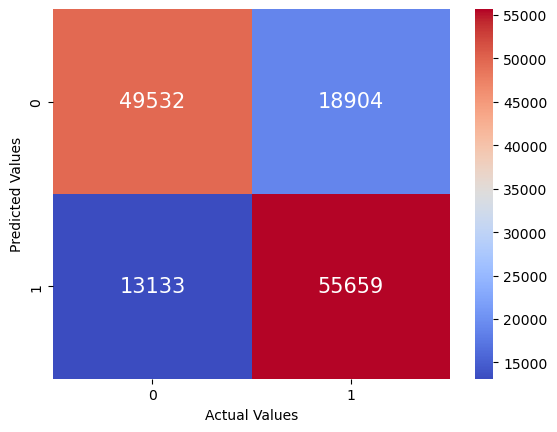

In [166]:
cf_matrix = confusion_matrix(y_test1, y_pred_sgbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
param_grid = { 
    #'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [176]:
print(CV_dt.best_params_)
accuracy = CV_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 73.25%


In [177]:
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 'sqrt')
dt.fit(X_train1, y_train1)
y_pred_dt = dt.predict(X_test1)
dt_acc_ros = accuracy_score(y_test1, y_pred_dt)
dt_f1_ros = f1_score(y_test1, y_pred_dt, average='macro')
dt_precision_ros = precision_score(y_test1, y_pred_dt, average='macro')
dt_recall_ros = recall_score(y_test1, y_pred_dt, average='macro')
dt_mcc_ros = matthews_corrcoef(y_test1, y_pred_dt)

In [178]:
print(classification_report(y_test1,CV_dt.best_estimator_.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72     68436
           1       0.71      0.82      0.76     68792

    accuracy                           0.74    137228
   macro avg       0.75      0.74      0.74    137228
weighted avg       0.75      0.74      0.74    137228



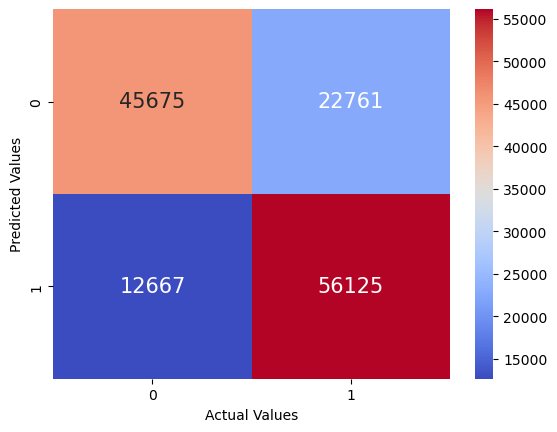

In [179]:
cf_matrix = confusion_matrix(y_test1,CV_dt.best_estimator_.predict(X_test1))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Random Forest

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [181]:
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


In [182]:
print(classification_report(y_test1,CV_rfc.best_estimator_.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73     68436
           1       0.72      0.82      0.77     68792

    accuracy                           0.75    137228
   macro avg       0.76      0.75      0.75    137228
weighted avg       0.76      0.75      0.75    137228



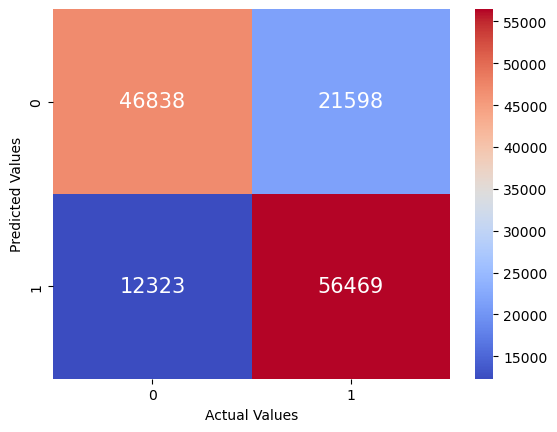

In [183]:
cf_matrix = confusion_matrix(y_test1,CV_rfc.best_estimator_.predict(X_test1))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [184]:
rf = RandomForestClassifier(random_state=42, criterion= 'entropy', max_depth=5, max_features= 'sqrt', n_estimators= 500)
rf.fit(X_train1, y_train1)
y_pred_rf = rf.predict(X_test1)
rf_acc_ros = accuracy_score(y_test1, y_pred_rf)
rf_f1_ros = f1_score(y_test1, y_pred_rf, average='macro')
rf_precision_ros = precision_score(y_test1, y_pred_rf, average='macro')
rf_recall_ros = recall_score(y_test1, y_pred_rf, average='macro')
rf_mcc_ros = matthews_corrcoef(y_test1, y_pred_rf)

#### Logistic Regression

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    {
        'C': [0.001,0.01,0.1,1,10,100,1000,2000,3500,5000,7500,10000,20000,35000,50000],
        'penalty': ['l2','l1'],
        'solver': ['liblinear','newton-cholesky', 'sag','newton-cg', 'lbfgs' ],
        #'n_jobs': [-1]
    }, 
    
]
logreg_cv=GridSearchCV(LogisticRegression(random_state=42,max_iter=30000),param_grid,cv=5)
logreg_cv.fit(X_train1,y_train1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=30000, random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3500,
                                5000, 7500, 10000, 20000, 35000, 50000],
                          'penalty': ['l2', 'l1'],
                          'solver': ['liblinear', 'newton-cholesky', 'sag',
                                     'newton-cg', 'lbfgs']}])

In [168]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy))

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for our training dataset with tuning is : 74.78%


In [170]:
print(classification_report(y_test1,logreg_cv.best_estimator_.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     68436
           1       0.74      0.77      0.75     68792

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



In [173]:
log_reg = LogisticRegression(random_state=42,max_iter=30000,C= 0.001, penalty= 'l2', solver= 'liblinear')
log_reg.fit(X_train1, y_train1)
y_pred_logreg = log_reg.predict(X_test1)
log_reg_acc_ros = accuracy_score(y_test1, y_pred_logreg)
log_reg_f1_ros = f1_score(y_test1, y_pred_logreg, average='macro')
log_reg_precision_ros = precision_score(y_test1, y_pred_logreg, average='macro')
log_reg_recall_ros = recall_score(y_test1, y_pred_logreg, average='macro')
log_reg_mcc_ros = matthews_corrcoef(y_test1, y_pred_logreg)

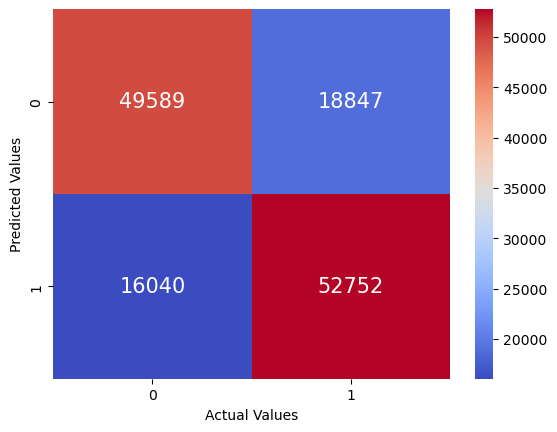

In [174]:
#plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test1,logreg_cv.best_estimator_.predict(X_test1))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### SGD Classifier

In [185]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}
grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [186]:
# best parameter 
grid_search.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}

In [187]:
sgd = SGDClassifier(alpha = 0.01, loss = 'hinge', penalty = 'l2')
sgd.fit(X_train1, y_train1)

SGDClassifier(alpha=0.01)

In [188]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 74.82%


In [189]:
# model predictions 
y_pred_sgd = sgd.predict(X_test1)

In [190]:
# accuracy score

print(accuracy_score(y_train1, sgd.predict(X_train1)))
sgd_acc_ros = accuracy_score(y_test1, y_pred_sgd)
sgd_f1_ros = f1_score(y_test1, y_pred_sgd, average='macro')
sgd_precision_ros = precision_score(y_test1, y_pred_sgd, average='macro')
sgd_recall_ros = recall_score(y_test1, y_pred_sgd, average='macro')
sgd_mcc_ros = matthews_corrcoef(y_test1, y_pred_sgd)
print(sgd_acc_ros)

0.7482292243565453
0.7469685486926866


In [191]:
print(classification_report(y_test1, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     68436
           1       0.72      0.80      0.76     68792

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



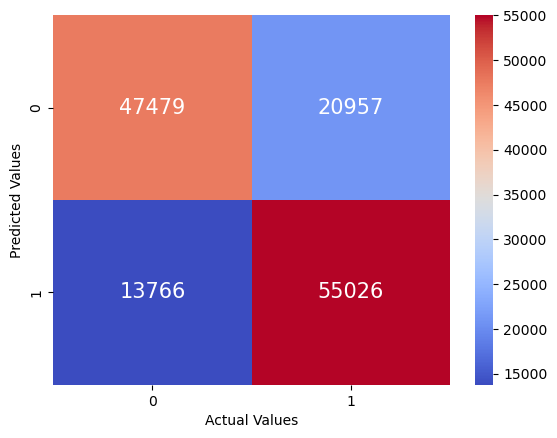

In [192]:
cf_matrix = confusion_matrix(y_test1, y_pred_sgd)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### XG Boost

In [193]:
f=y_train1.astype(int)
f

array([0, 1, 1, ..., 1, 0, 0])

In [194]:
from xgboost import XGBClassifier
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

XGB_model = XGBClassifier(seed=42)
xgbcv=GridSearchCV(estimator=XGB_model,param_grid=params,cv=5)
xgbcv.fit(X_train1, f)

print(xgbcv.best_params_)
accuracy = xgbcv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'learning_rate': 0.1, 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 79.09%


In [195]:
f2=y_test1.astype(int)
f2

array([1, 1, 0, ..., 0, 1, 0])

In [196]:
print(classification_report(f2,xgbcv.best_estimator_.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     68436
           1       0.77      0.83      0.80     68792

    accuracy                           0.79    137228
   macro avg       0.79      0.79      0.79    137228
weighted avg       0.79      0.79      0.79    137228



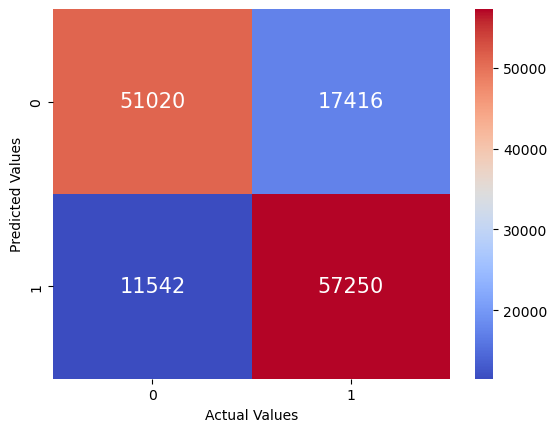

In [197]:
cf_matrix = confusion_matrix(f2,xgbcv.best_estimator_.predict(X_test1))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [198]:
xgb = XGBClassifier(seed=42,learning_rate= 0.01, n_estimators= 500)
xgb.fit(X_train1, f)
y_pred_xgb = xgb.predict(X_test1)
xgb_acc_ros = accuracy_score(f2, y_pred_xgb)
xgb_f1_ros = f1_score(f2, y_pred_xgb, average='macro')
xgb_precision_ros = precision_score(f2, y_pred_xgb, average='macro')
xgb_recall_ros = recall_score(f2, y_pred_xgb, average='macro')
xgb_mcc_ros = matthews_corrcoef(f2, y_pred_xgb)

In [201]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XgBoost',
              'SGD Classifier','Ada Boost Classifier','Gradient Boosting Classifier',
              'Stochastic Gradient Boosting','CAT Boost', 'Extra Trees Classifier',
              'Linear Discriminant Analysis','Naive Bayes Classifier'],
    'Accuracy': [log_reg_acc_ros,rf_acc_ros,dt_acc_ros,xgb_acc_ros,sgd_acc_ros,ada_acc_ros,gbc_acc_ros,sgbc_acc_ros,
                 acc_cat_ros,etc_acc_ros,lda_acc_ros,gnb_acc_ros],
    'F1-Score': [log_reg_f1_ros,rf_f1_ros,dt_f1_ros,xgb_f1_ros,sgd_f1_ros,ada_f1_ros,gbc_f1_ros,sgbc_f1_ros,cat_f1_ros,
                 etc_f1_ros,lda_f1_ros,gnb_f1_ros],
    'Precision': [log_reg_precision_ros,rf_precision_ros,dt_precision_ros,xgb_precision_ros,sgd_precision_ros,
                  ada_precision_ros,gbc_precision_ros,sgbc_precision_ros,cat_precision_ros,etc_precision_ros,
                  lda_precision_ros,gnb_precision_ros],
    'Recall':[log_reg_recall_ros,rf_recall_ros,dt_recall_ros,xgb_recall_ros,sgd_recall_ros,
                  ada_recall_ros,gbc_recall_ros,sgbc_recall_ros,cat_recall_ros,etc_recall_ros,
                  lda_recall_ros,gnb_recall_ros],
    'MCC': [log_reg_mcc_ros,rf_mcc_ros,dt_mcc_ros,xgb_mcc_ros,sgd_mcc_ros,ada_mcc_ros,gbc_mcc_ros,sgbc_mcc_ros,
            cat_mcc_ros,etc_mcc_ros,lda_mcc_ros,gnb_mcc_ros]
})
models.sort_values(by = 'F1-Score', ascending = False)

Model  Accuracy  F1-Score  Precision    Recall  \
9         Extra Trees Classifier  0.957166  0.957161   0.957320  0.957144   
5           Ada Boost Classifier  0.783535  0.783439   0.783931  0.783486   
8                      CAT Boost  0.771191  0.770802   0.772826  0.771089   
7   Stochastic Gradient Boosting  0.766542  0.766075   0.768447  0.766431   
3                        XgBoost  0.766083  0.765431   0.768792  0.765951   
6   Gradient Boosting Classifier  0.759175  0.758991   0.759826  0.759108   
1       Random Forest Classifier  0.752813  0.751589   0.757522  0.752636   
4                 SGD Classifier  0.746969  0.746201   0.749709  0.746831   
10  Linear Discriminant Analysis  0.746254  0.746059   0.746875  0.746188   
0            Logistic Regression  0.745773  0.745638   0.746183  0.745719   
2       Decision Tree Classifier  0.719700  0.717503   0.726311  0.719476   
11        Naive Bayes Classifier  0.700732  0.697502   0.710208  0.701004   

         MCC  
9   0.914463  
5   0.567416  
8   0.543912  
7   0.534875  
3   0.534735  
6   0.518933  
1   0.510135  
4   0.496532  
10  0.493062  
0   0.491901  
2   0.445734  
11  0.411109

## With SMOTE (Synthetic Minority Oversampling Technique) with Evaluation

In [36]:
data4 = data1.copy()
X = data4.drop(["HeartDisease"] , axis = 1).values
y = data4["HeartDisease"].values

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_smote, y_smote= sm.fit_resample(X, y)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [39]:
ro_scaler = RobustScaler()
X_train2 = ro_scaler.fit_transform(X_train2)
X_test2 = ro_scaler.fit_transform(X_test2)

#### Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train2, y_train2)

GaussianNB()

In [41]:
y_pred_gnb = gnb.predict(X_test2)

In [42]:
print(accuracy_score(y_train2, gnb.predict(X_train2)))
gnb_acc_smote = accuracy_score(y_test2, y_pred_gnb)
gnb_f1_smote = f1_score(y_test2, y_pred_gnb, average='macro')
gnb_precision_smote = precision_score(y_test2, y_pred_gnb, average='macro')
gnb_recall_smote = recall_score(y_test2, y_pred_gnb, average='macro')
gnb_mcc_smote = matthews_corrcoef(y_test2, y_pred_gnb)
print(gnb_acc_smote)

0.705873922717424
0.7031436733028245


In [43]:
print(classification_report(y_test2, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72     68436
           1       0.74      0.62      0.68     68792

    accuracy                           0.70    137228
   macro avg       0.71      0.70      0.70    137228
weighted avg       0.71      0.70      0.70    137228



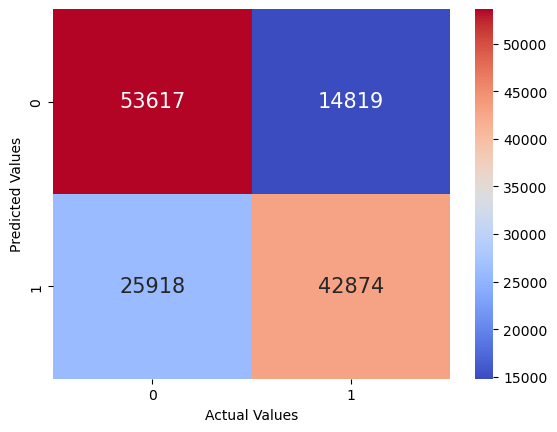

In [44]:
cf_matrix = confusion_matrix(y_test2, y_pred_gnb)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train2,y_train2)

LinearDiscriminantAnalysis()

In [46]:
y_pred_lda = lda.predict(X_test2)

In [47]:
print(accuracy_score(y_train2, lda.predict(X_train2)))
lda_acc_smote = accuracy_score(y_test2, y_pred_lda)
lda_f1_smote = f1_score(y_test2, y_pred_lda, average='macro')
lda_precision_smote = precision_score(y_test2, y_pred_lda, average='macro')
lda_recall_smote = recall_score(y_test2, y_pred_lda, average='macro')
lda_mcc_smote = matthews_corrcoef(y_test2, y_pred_lda)
print(lda_acc_smote)

0.7544135793472664
0.7537018684233538


In [48]:
print(classification_report(y_test2, y_pred_lda))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     68436
           1       0.74      0.79      0.76     68792

    accuracy                           0.75    137228
   macro avg       0.76      0.75      0.75    137228
weighted avg       0.76      0.75      0.75    137228



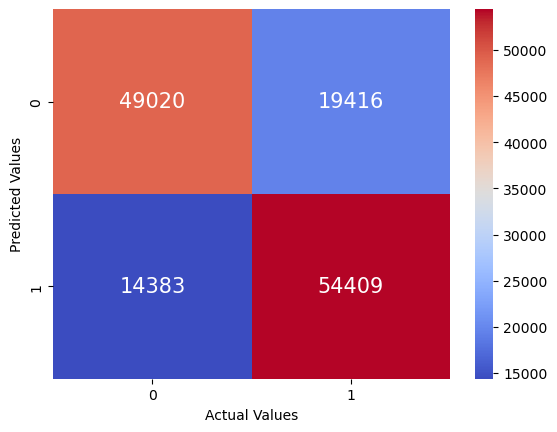

In [49]:
cf_matrix = confusion_matrix(y_test2, y_pred_lda)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 'sqrt')

#### ADA Boost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt)

ada = AdaBoostClassifier(dt, n_estimators = 180)
ada.fit(X_train2, y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    max_features='sqrt',
                                                    random_state=42),
                   n_estimators=180)

In [52]:
y_pred_ada = ada.predict(X_test2)

In [53]:
# accuracy score

print(accuracy_score(y_train2, ada.predict(X_train2)))

ada_acc_smote = accuracy_score(y_test2, y_pred_ada)
ada_f1_smote = f1_score(y_test2, y_pred_ada, average='macro')
ada_precision_smote = precision_score(y_test2, y_pred_ada, average='macro')
ada_recall_smote = recall_score(y_test2, y_pred_ada, average='macro')
ada_mcc_smote = matthews_corrcoef(y_test2, y_pred_ada)
print(ada_acc_smote)

0.9426404718181907
0.5327775672603259


In [54]:
# classification report

print(classification_report(y_test2, y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.07      0.12     68436
           1       0.52      1.00      0.68     68792

    accuracy                           0.53    137228
   macro avg       0.74      0.53      0.40    137228
weighted avg       0.74      0.53      0.40    137228



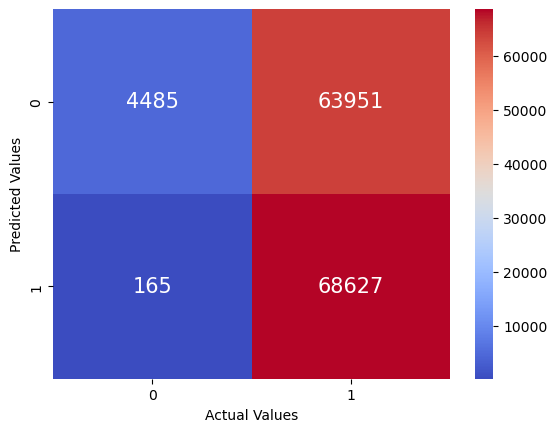

In [55]:
cf_matrix = confusion_matrix(y_test2, y_pred_ada)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Extra Trees Classifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train2, y_train2)

ExtraTreesClassifier()

In [57]:
y_pred_etc = etc.predict(X_test2)

In [58]:
print(accuracy_score(y_train2, etc.predict(X_train2)))
etc_acc_smote = accuracy_score(y_test2, y_pred_etc)
etc_f1_smote = f1_score(y_test2, y_pred_etc, average='macro')
etc_precision_smote = precision_score(y_test2, y_pred_etc, average='macro')
etc_recall_smote = recall_score(y_test2, y_pred_etc, average='macro')
etc_mcc_smote = matthews_corrcoef(y_test2, y_pred_etc)
print(etc_acc_smote)

0.9984672710136901
0.8191331215203894


In [59]:
print(classification_report(y_test2, y_pred_etc))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     68436
           1       0.75      0.97      0.84     68792

    accuracy                           0.82    137228
   macro avg       0.85      0.82      0.82    137228
weighted avg       0.85      0.82      0.82    137228



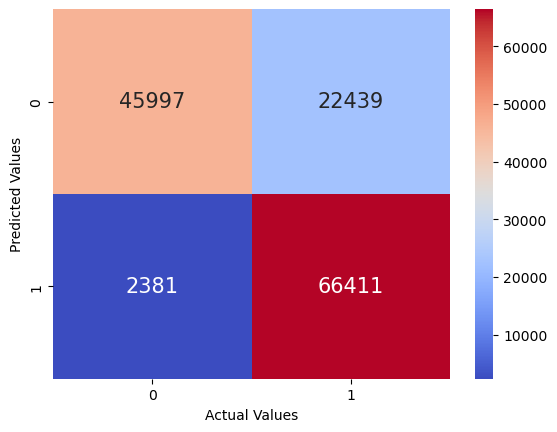

In [60]:
cf_matrix = confusion_matrix(y_test2, y_pred_etc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Gradient Boosting Classifier

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train2, y_train2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [63]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 200}

In [64]:
# best score

grid_search_gbc.best_score_

0.9344351507450911

In [65]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 200)
gbc.fit(X_train2, y_train2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GradientBoostingClassifier(learning_rate=1, loss='deviance', n_estimators=200)

In [66]:
y_pred_gbc = gbc.predict(X_test2)

In [67]:
# accuracy score

print(accuracy_score(y_train2, gbc.predict(X_train2)))

gbc_acc_smote = accuracy_score(y_test2, y_pred_gbc)
gbc_f1_smote = f1_score(y_test2, y_pred_gbc, average='macro')
gbc_precision_smote = precision_score(y_test2, y_pred_gbc, average='macro')
gbc_recall_smote = recall_score(y_test2, y_pred_gbc, average='macro')
gbc_mcc_smote = matthews_corrcoef(y_test2, y_pred_gbc)
print(gbc_acc_smote)

0.9376293467805404
0.595753053312735


In [68]:
# classification report
print(classification_report(y_test2, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.19      0.32     68436
           1       0.55      1.00      0.71     68792

    accuracy                           0.60    137228
   macro avg       0.77      0.59      0.52    137228
weighted avg       0.77      0.60      0.52    137228



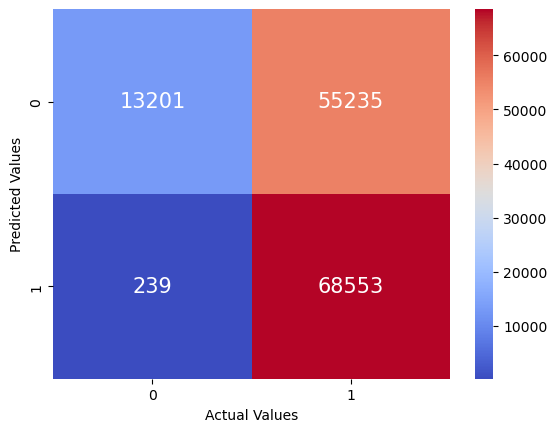

In [69]:
cf_matrix = confusion_matrix(y_test2, y_pred_gbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Cat Boost

In [70]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train2, y_train2)

Learning rate set to 0.5
0:	learn: 0.5246241	total: 189ms	remaining: 18.7s
1:	learn: 0.4409259	total: 225ms	remaining: 11s
2:	learn: 0.4069030	total: 258ms	remaining: 8.35s
3:	learn: 0.3772745	total: 291ms	remaining: 6.97s
4:	learn: 0.3520073	total: 323ms	remaining: 6.14s
5:	learn: 0.3291235	total: 356ms	remaining: 5.58s
6:	learn: 0.3061892	total: 390ms	remaining: 5.18s
7:	learn: 0.2901026	total: 423ms	remaining: 4.87s
8:	learn: 0.2815706	total: 457ms	remaining: 4.62s
9:	learn: 0.2743528	total: 489ms	remaining: 4.4s
10:	learn: 0.2667923	total: 522ms	remaining: 4.22s
11:	learn: 0.2567277	total: 556ms	remaining: 4.08s
12:	learn: 0.2516042	total: 589ms	remaining: 3.94s
13:	learn: 0.2459294	total: 624ms	remaining: 3.83s
14:	learn: 0.2418467	total: 659ms	remaining: 3.73s
15:	learn: 0.2332311	total: 693ms	remaining: 3.64s
16:	learn: 0.2294658	total: 727ms	remaining: 3.55s
17:	learn: 0.2233314	total: 762ms	remaining: 3.47s
18:	learn: 0.2181695	total: 798ms	remaining: 3.4s
19:	learn: 0.2160114

In [71]:
y_pred_cat = cat.predict(X_test2)

In [72]:
print(accuracy_score(y_train2, cat.predict(X_train2)))
acc_cat_smote = accuracy_score(y_test2, y_pred_cat)
cat_f1_smote = f1_score(y_test2, y_pred_cat, average='macro')
cat_precision_smote = precision_score(y_test2, y_pred_cat, average='macro')
cat_recall_smote = recall_score(y_test2, y_pred_cat, average='macro')
cat_mcc_smote = matthews_corrcoef(y_test2, y_pred_cat)
print(acc_cat_smote)

0.9340562178758465
0.6487670154778908


In [73]:
print(classification_report(y_test2, y_pred_cat))

              precision    recall  f1-score   support

           0       0.98      0.30      0.46     68436
           1       0.59      0.99      0.74     68792

    accuracy                           0.65    137228
   macro avg       0.78      0.65      0.60    137228
weighted avg       0.78      0.65      0.60    137228



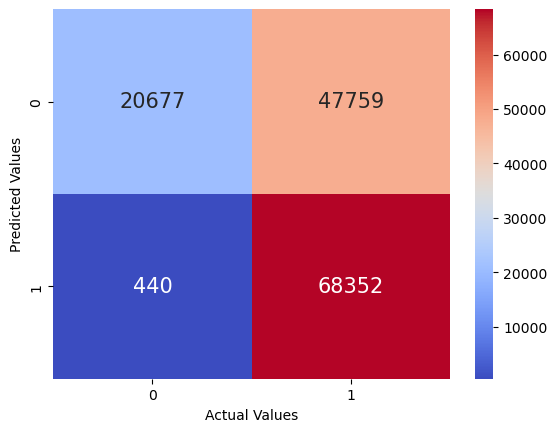

In [74]:
cf_matrix = confusion_matrix(y_test2, y_pred_cat)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Stochastic Gradient Boosting

In [75]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)
sgbc.fit(X_train2, y_train2)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [76]:
y_pred_sgbc = sgbc.predict(X_test2)

In [77]:
# accuracy score

print(accuracy_score(y_train2, sgbc.predict(X_train2)))

sgbc_acc_smote = accuracy_score(y_test2, y_pred_sgbc)
sgbc_f1_smote = f1_score(y_test2, y_pred_sgbc, average='macro')
sgbc_precision_smote = precision_score(y_test2, y_pred_sgbc, average='macro')
sgbc_recall_smote = recall_score(y_test2, y_pred_sgbc, average='macro')
sgbc_mcc_smote = matthews_corrcoef(y_test2, y_pred_sgbc)
print(sgbc_acc_smote)

0.9263342758037718
0.6483662226367797


In [78]:
# classification report
print(classification_report(y_test2, y_pred_sgbc))

              precision    recall  f1-score   support

           0       0.97      0.31      0.46     68436
           1       0.59      0.99      0.74     68792

    accuracy                           0.65    137228
   macro avg       0.78      0.65      0.60    137228
weighted avg       0.78      0.65      0.60    137228



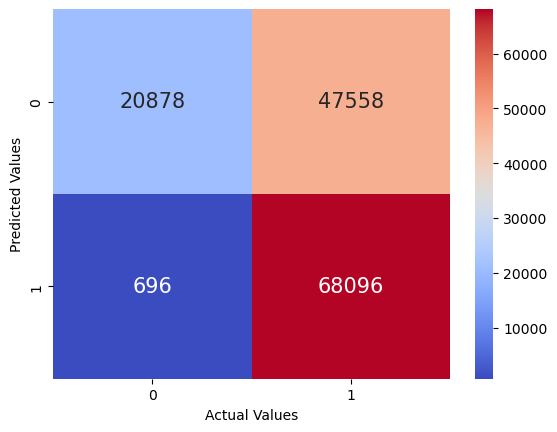

In [79]:
cf_matrix = confusion_matrix(y_test2, y_pred_sgbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
param_grid = { 
    #'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [81]:
print(CV_dt.best_params_)
accuracy = CV_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 81.13%


In [82]:
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 'sqrt')
dt.fit(X_train2, y_train2)
y_pred_dt = dt.predict(X_test2)
dt_acc_smote = accuracy_score(y_test2, y_pred_dt)
dt_f1_smote = f1_score(y_test2, y_pred_dt, average='macro')
dt_precision_smote = precision_score(y_test2, y_pred_dt, average='macro')
dt_recall_smote = recall_score(y_test2, y_pred_dt, average='macro')
dt_mcc_smote = matthews_corrcoef(y_test2, y_pred_dt)

In [83]:
print(classification_report(y_test2,CV_dt.best_estimator_.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.86      0.28      0.42     68436
           1       0.57      0.95      0.71     68792

    accuracy                           0.62    137228
   macro avg       0.71      0.62      0.57    137228
weighted avg       0.71      0.62      0.57    137228



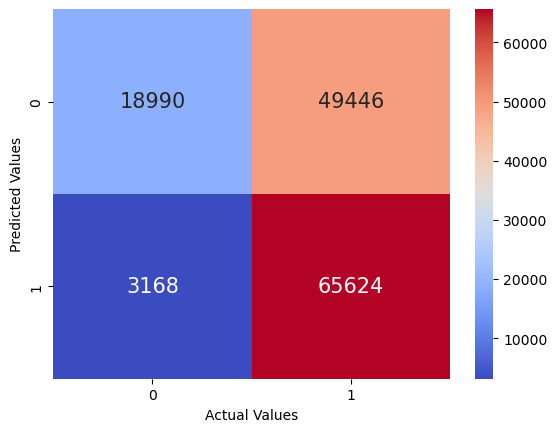

In [84]:
cf_matrix = confusion_matrix(y_test2,CV_dt.best_estimator_.predict(X_test2))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Random Forest

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [86]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


In [87]:
print(classification_report(y_test2,CV_rfc.best_estimator_.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.91      0.50      0.65     68436
           1       0.66      0.95      0.78     68792

    accuracy                           0.73    137228
   macro avg       0.78      0.73      0.71    137228
weighted avg       0.78      0.73      0.71    137228



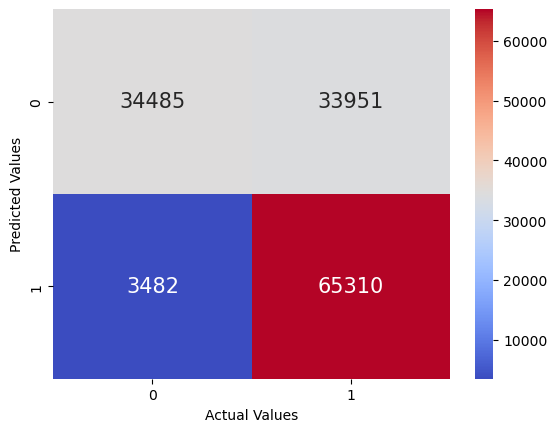

In [88]:
cf_matrix = confusion_matrix(y_test2,CV_rfc.best_estimator_.predict(X_test2))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [91]:
rf = RandomForestClassifier(random_state=42, criterion= 'gini', max_depth=5, max_features= 'sqrt', n_estimators= 500)
rf.fit(X_train2, y_train2)
y_pred_rf = rf.predict(X_test2)
rf_acc_smote = accuracy_score(y_test2, y_pred_rf)
rf_f1_smote = f1_score(y_test2, y_pred_rf, average='macro')
rf_precision_smote = precision_score(y_test2, y_pred_rf, average='macro')
rf_recall_smote = recall_score(y_test2, y_pred_rf, average='macro')
rf_mcc_smote = matthews_corrcoef(y_test2, y_pred_rf)

#### Logistic Regression

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    {
        'C': [0.001,0.01,0.1,1,10,100,1000,2000,3500,5000,7500,10000,20000,35000,50000],
        'penalty': ['l2','l1'],
        'solver': ['liblinear','newton-cholesky', 'sag','newton-cg', 'lbfgs' ],
        #'n_jobs': [-1]
    }, 
    
]
logreg_cv=GridSearchCV(LogisticRegression(random_state=42,max_iter=30000),param_grid,cv=5)
logreg_cv.fit(X_train2,y_train2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=30000, random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3500,
                                5000, 7500, 10000, 20000, 35000, 50000],
                          'penalty': ['l2', 'l1'],
                          'solver': ['liblinear', 'newton-cholesky', 'sag',
                                     'newton-cg', 'lbfgs']}])

In [92]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy))

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Accuracy for our training dataset with tuning is : 75.39%


In [93]:
print(classification_report(y_test2,logreg_cv.best_estimator_.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     68436
           1       0.74      0.78      0.76     68792

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



In [94]:
log_reg = LogisticRegression(random_state=42,max_iter=30000,C= 10, penalty= 'l2', solver= 'sag')
log_reg.fit(X_train2, y_train2)
y_pred_logreg = log_reg.predict(X_test2)
log_reg_acc_smote = accuracy_score(y_test2, y_pred_logreg)
log_reg_f1_smote = f1_score(y_test2, y_pred_logreg, average='macro')
log_reg_precision_smote = precision_score(y_test2, y_pred_logreg, average='macro')
log_reg_recall_smote = recall_score(y_test2, y_pred_logreg, average='macro')
log_reg_mcc_smote = matthews_corrcoef(y_test2, y_pred_logreg)

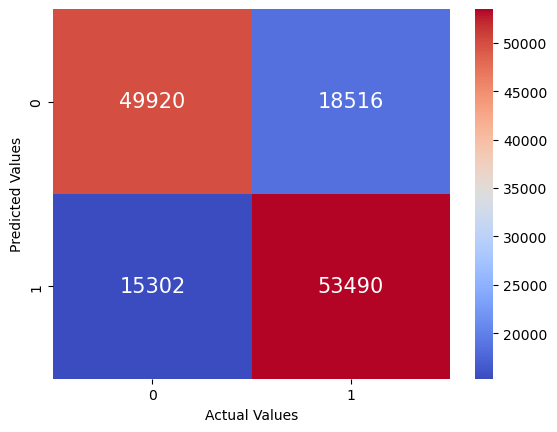

In [95]:
#plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test2,logreg_cv.best_estimator_.predict(X_test2))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### SGD Classifier

In [96]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}
grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [97]:
# best parameter 
grid_search.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

In [98]:
sgd = SGDClassifier(alpha = 0.001, loss = 'hinge', penalty = 'l2')
sgd.fit(X_train2, y_train2)

SGDClassifier(alpha=0.001)

In [99]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 75.50%


In [100]:
# model predictions 
y_pred_sgd = sgd.predict(X_test2)

In [102]:
# accuracy score

print(accuracy_score(y_train2, sgd.predict(X_train2)))
sgd_acc_smote = accuracy_score(y_test2, y_pred_sgd)
sgd_f1_smote = f1_score(y_test2, y_pred_sgd, average='macro')
sgd_precision_smote = precision_score(y_test2, y_pred_sgd, average='macro')
sgd_recall_smote = recall_score(y_test2, y_pred_sgd, average='macro')
sgd_mcc_smote = matthews_corrcoef(y_test2, y_pred_sgd)
print(sgd_acc_smote)

0.7546880617172395
0.754357711254263


In [105]:
print(classification_report(y_test2, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74     68436
           1       0.73      0.80      0.77     68792

    accuracy                           0.75    137228
   macro avg       0.76      0.75      0.75    137228
weighted avg       0.76      0.75      0.75    137228



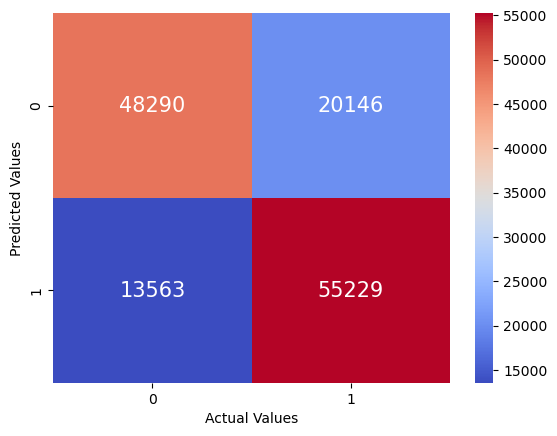

In [106]:
cf_matrix = confusion_matrix(y_test2, y_pred_sgd)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### XG Boost

In [107]:
f=y_train2.astype(int)
f

array([0, 1, 1, ..., 1, 0, 0])

In [108]:
from xgboost import XGBClassifier
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

XGB_model = XGBClassifier(seed=42)
xgbcv=GridSearchCV(estimator=XGB_model,param_grid=params,cv=5)
xgbcv.fit(X_train2, f)

print(xgbcv.best_params_)
accuracy = xgbcv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

{'learning_rate': 0.1, 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 93.19%


In [110]:
f2=y_test2.astype(int)
f2

array([1, 1, 0, ..., 0, 1, 0])

In [111]:
print(classification_report(f2,xgbcv.best_estimator_.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61     68436
           1       0.64      0.97      0.77     68792

    accuracy                           0.71    137228
   macro avg       0.79      0.71      0.69    137228
weighted avg       0.79      0.71      0.69    137228



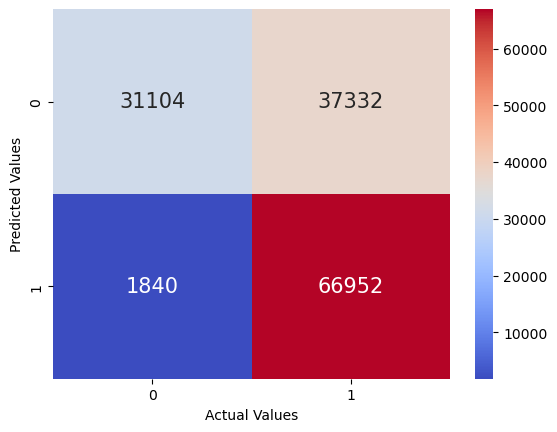

In [112]:
cf_matrix = confusion_matrix(f2,xgbcv.best_estimator_.predict(X_test2))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [113]:
xgb = XGBClassifier(seed=42,learning_rate= 0.1, n_estimators= 500)
xgb.fit(X_train2, f)
y_pred_xgb = xgb.predict(X_test2)
xgb_acc_smote = accuracy_score(f2, y_pred_xgb)
xgb_f1_smote = f1_score(f2, y_pred_xgb, average='macro')
xgb_precision_smote = precision_score(f2, y_pred_xgb, average='macro')
xgb_recall_smote = recall_score(f2, y_pred_xgb, average='macro')
xgb_mcc_smote = matthews_corrcoef(f2, y_pred_xgb)

In [114]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XgBoost',
              'SGD Classifier','Ada Boost Classifier','Gradient Boosting Classifier',
              'Stochastic Gradient Boosting','CAT Boost', 'Extra Trees Classifier',
              'Linear Discriminant Analysis','Naive Bayes Classifier'],
    'Accuracy': [log_reg_acc_smote,rf_acc_smote,dt_acc_smote,xgb_acc_smote,sgd_acc_smote,ada_acc_smote,gbc_acc_smote,
                 sgbc_acc_smote,acc_cat_smote,etc_acc_smote,lda_acc_smote,gnb_acc_smote],
    'F1-Score': [log_reg_f1_smote,rf_f1_smote,dt_f1_smote,xgb_f1_smote,sgd_f1_smote,ada_f1_smote,gbc_f1_smote,
                 sgbc_f1_smote,cat_f1_smote,etc_f1_smote,lda_f1_smote,gnb_f1_smote],
    'Precision': [log_reg_precision_smote,rf_precision_smote,dt_precision_smote,xgb_precision_smote,sgd_precision_smote,
                  ada_precision_smote,gbc_precision_smote,sgbc_precision_smote,cat_precision_smote,etc_precision_smote,
                  lda_precision_smote,gnb_precision_smote],
    'Recall':[log_reg_recall_smote,rf_recall_smote,dt_recall_smote,xgb_recall_smote,sgd_recall_smote,
                  ada_recall_smote,gbc_recall_smote,sgbc_recall_smote,cat_recall_smote,etc_recall_smote,
                  lda_recall_smote,gnb_recall_smote],
    'MCC': [log_reg_mcc_smote,rf_mcc_smote,dt_mcc_smote,xgb_mcc_smote,sgd_mcc_smote,ada_mcc_smote,gbc_mcc_smote,
            sgbc_mcc_smote,cat_mcc_smote,etc_mcc_smote,lda_mcc_smote,gnb_mcc_smote]
})
models.sort_values(by = 'F1-Score', ascending = False)

Model  Accuracy  F1-Score  Precision    Recall  \
9         Extra Trees Classifier  0.819133  0.815040   0.849117  0.818753   
4                 SGD Classifier  0.754358  0.753728   0.756723  0.754232   
0            Logistic Regression  0.753563  0.753397   0.754120  0.753501   
10  Linear Discriminant Analysis  0.753702  0.753321   0.755075  0.753605   
1       Random Forest Classifier  0.727220  0.712725   0.783126  0.726643   
11        Naive Bayes Classifier  0.703144  0.701313   0.708636  0.703351   
3                        XgBoost  0.714548  0.693642   0.793082  0.713875   
2       Decision Tree Classifier  0.653948  0.635814   0.690968  0.653374   
7   Stochastic Gradient Boosting  0.648366  0.601144   0.778265  0.647478   
8                      CAT Boost  0.648767  0.600555   0.783921  0.647870   
6   Gradient Boosting Classifier  0.595753  0.517203   0.768005  0.594711   
5           Ada Boost Classifier  0.532778  0.402167   0.741076  0.531569   

         MCC  
9   0.667179  
4   0.510948  
0   0.507621  
10  0.508678  
1   0.506629  
11  0.411953  
3   0.500731  
2   0.342284  
7   0.405156  
8   0.409797  
6   0.318641  
5   0.174475

## ADASYN Random over-sampling

In [35]:
data5 = data1.copy()
X = data5.drop(["HeartDisease"] , axis = 1).values
y = data5["HeartDisease"].values

In [36]:
from imblearn.over_sampling import ADASYN
X_AD, y_AD = ADASYN(random_state=42).fit_resample(X, y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_AD, y_AD, test_size=0.3, random_state=42)

In [37]:
ro_scaler = RobustScaler()
X_train3 = ro_scaler.fit_transform(X_train3)
X_test3 = ro_scaler.fit_transform(X_test3)

#### Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train3, y_train3)

GaussianNB()

In [39]:
y_pred_gnb = gnb.predict(X_test3)

In [40]:
print(accuracy_score(y_train3, gnb.predict(X_train3)))
gnb_acc_adasyn = accuracy_score(y_test3, y_pred_gnb)
gnb_f1_adasyn = f1_score(y_test3, y_pred_gnb, average='macro')
gnb_precision_adasyn = precision_score(y_test3, y_pred_gnb, average='macro')
gnb_recall_adasyn = recall_score(y_test3, y_pred_gnb, average='macro')
gnb_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_gnb)
print(gnb_acc_adasyn)

0.693066361914304
0.6919199298655757


In [41]:
print(classification_report(y_test3, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72     82129
           1       0.73      0.61      0.66     82127

    accuracy                           0.69    164256
   macro avg       0.70      0.69      0.69    164256
weighted avg       0.70      0.69      0.69    164256



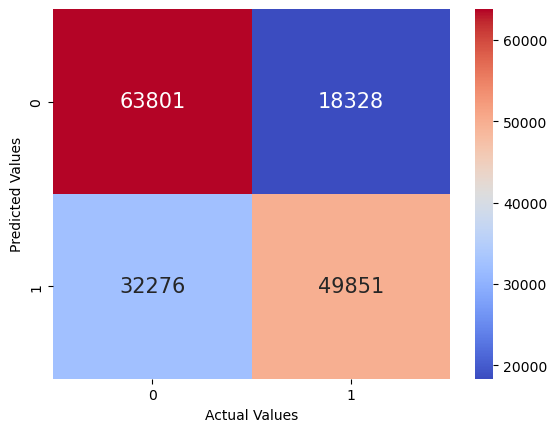

In [42]:
cf_matrix = confusion_matrix(y_test3, y_pred_gnb)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train3,y_train3)

LinearDiscriminantAnalysis()

In [44]:
y_pred_lda = lda.predict(X_test3)

In [45]:
print(accuracy_score(y_train3, lda.predict(X_train3)))
lda_acc_adasyn = accuracy_score(y_test3, y_pred_lda)
lda_f1_adasyn = f1_score(y_test3, y_pred_lda, average='macro')
lda_precision_adasyn = precision_score(y_test3, y_pred_lda, average='macro')
lda_recall_adasyn = recall_score(y_test3, y_pred_lda, average='macro')
lda_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_lda)
print(lda_acc_adasyn)

0.7420302560650417
0.7428100038963569


In [46]:
print(classification_report(y_test3, y_pred_lda))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     82129
           1       0.73      0.77      0.75     82127

    accuracy                           0.74    164256
   macro avg       0.74      0.74      0.74    164256
weighted avg       0.74      0.74      0.74    164256



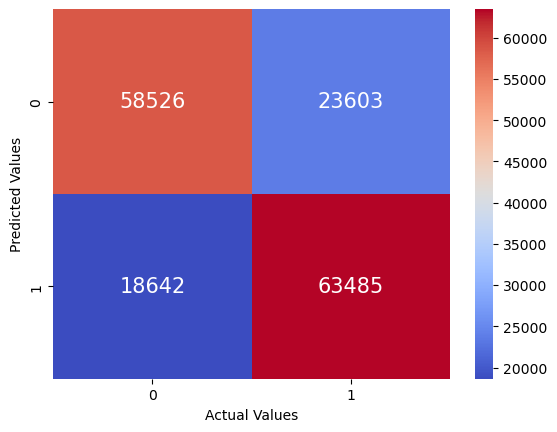

In [47]:
cf_matrix = confusion_matrix(y_test3, y_pred_lda)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 'sqrt')

#### ADA Boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dt)

ada = AdaBoostClassifier(dt, n_estimators = 180)
ada.fit(X_train3, y_train3)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,
                                                    max_features='sqrt',
                                                    random_state=42),
                   n_estimators=180)

In [50]:
y_pred_ada = ada.predict(X_test3)

In [51]:
# accuracy score

print(accuracy_score(y_train3, ada.predict(X_train3)))

ada_acc_adasyn = accuracy_score(y_test3, y_pred_ada)
ada_f1_adasyn = f1_score(y_test3, y_pred_ada, average='macro')
ada_precision_adasyn = precision_score(y_test3, y_pred_ada, average='macro')
ada_recall_adasyn = recall_score(y_test3, y_pred_ada, average='macro')
ada_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_ada)
print(ada_acc_adasyn)

0.9439887074638237
0.5273414669783753


In [52]:
# classification report

print(classification_report(y_test3, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      0.06      0.10     82129
           1       0.51      1.00      0.68     82127

    accuracy                           0.53    164256
   macro avg       0.75      0.53      0.39    164256
weighted avg       0.75      0.53      0.39    164256



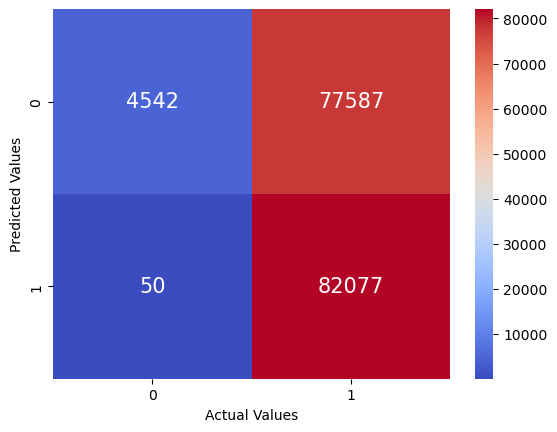

In [53]:
cf_matrix = confusion_matrix(y_test3, y_pred_ada)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train3, y_train3)

ExtraTreesClassifier()

In [55]:
y_pred_etc = etc.predict(X_test3)

In [56]:
print(accuracy_score(y_train3, etc.predict(X_train3)))
etc_acc_adasyn = accuracy_score(y_test3, y_pred_etc)
etc_f1_adasyn = f1_score(y_test3, y_pred_etc, average='macro')
etc_precision_adasyn = precision_score(y_test3, y_pred_etc, average='macro')
etc_recall_adasyn = recall_score(y_test3, y_pred_etc, average='macro')
etc_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_etc)
print(etc_acc_adasyn)

0.9985597319849085
0.7138308494058055


In [57]:
print(classification_report(y_test3, y_pred_etc))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     82129
           1       0.64      0.98      0.77     82127

    accuracy                           0.71    164256
   macro avg       0.80      0.71      0.69    164256
weighted avg       0.80      0.71      0.69    164256



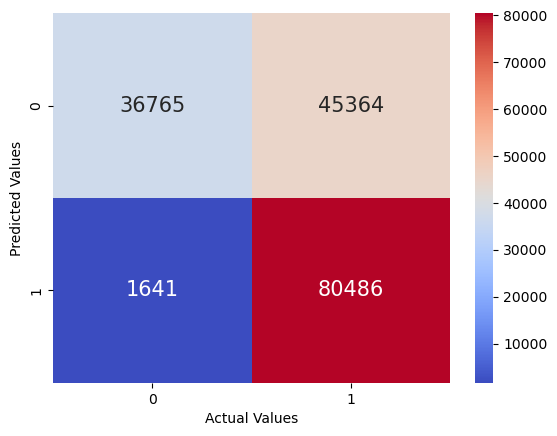

In [58]:
cf_matrix = confusion_matrix(y_test3, y_pred_etc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Gradient Boosting Classifier

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train3, y_train3)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [61]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 200}

In [62]:
# best score

grid_search_gbc.best_score_

0.935002686725532

In [63]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 200)
gbc.fit(X_train3, y_train3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



GradientBoostingClassifier(learning_rate=1, loss='deviance', n_estimators=200)

In [64]:
y_pred_gbc = gbc.predict(X_test3)

In [65]:
# accuracy score

print(accuracy_score(y_train3, gbc.predict(X_train3)))

gbc_acc_adasyn = accuracy_score(y_test3, y_pred_gbc)
gbc_f1_adasyn = f1_score(y_test3, y_pred_gbc, average='macro')
gbc_precision_adasyn = precision_score(y_test3, y_pred_gbc, average='macro')
gbc_recall_adasyn = recall_score(y_test3, y_pred_gbc, average='macro')
gbc_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_gbc)
print(gbc_acc_adasyn)

0.9384859443409469
0.5865173874926943


In [66]:
# classification report
print(classification_report(y_test3, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.99      0.17      0.30     82129
           1       0.55      1.00      0.71     82127

    accuracy                           0.59    164256
   macro avg       0.77      0.59      0.50    164256
weighted avg       0.77      0.59      0.50    164256



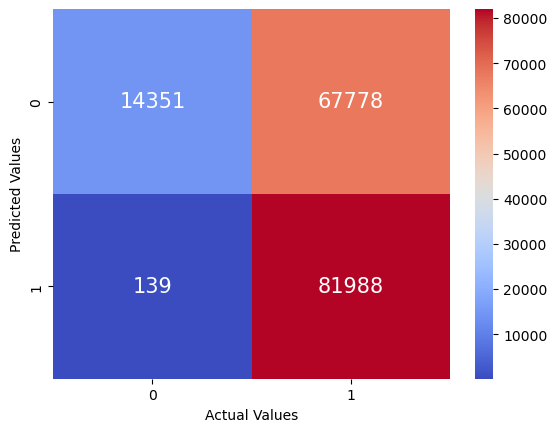

In [67]:
cf_matrix = confusion_matrix(y_test3, y_pred_gbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Cat Boost

In [68]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train3, y_train3)

Learning rate set to 0.5
0:	learn: 0.5291732	total: 184ms	remaining: 18.2s
1:	learn: 0.4473905	total: 218ms	remaining: 10.7s
2:	learn: 0.4072488	total: 248ms	remaining: 8.03s
3:	learn: 0.3827142	total: 281ms	remaining: 6.75s
4:	learn: 0.3506775	total: 315ms	remaining: 5.99s
5:	learn: 0.3247761	total: 351ms	remaining: 5.5s
6:	learn: 0.3095028	total: 384ms	remaining: 5.1s
7:	learn: 0.2942492	total: 416ms	remaining: 4.79s
8:	learn: 0.2793786	total: 449ms	remaining: 4.54s
9:	learn: 0.2720247	total: 480ms	remaining: 4.32s
10:	learn: 0.2643645	total: 513ms	remaining: 4.15s
11:	learn: 0.2574138	total: 548ms	remaining: 4.02s
12:	learn: 0.2524528	total: 581ms	remaining: 3.89s
13:	learn: 0.2392499	total: 617ms	remaining: 3.79s
14:	learn: 0.2344995	total: 652ms	remaining: 3.69s
15:	learn: 0.2294030	total: 685ms	remaining: 3.6s
16:	learn: 0.2263600	total: 719ms	remaining: 3.51s
17:	learn: 0.2219482	total: 753ms	remaining: 3.43s
18:	learn: 0.2177525	total: 788ms	remaining: 3.36s
19:	learn: 0.212443

In [69]:
y_pred_cat = cat.predict(X_test3)

In [70]:
print(accuracy_score(y_train3, cat.predict(X_train3)))
acc_cat_adasyn = accuracy_score(y_test3, y_pred_cat)
cat_f1_adasyn = f1_score(y_test3, y_pred_cat, average='macro')
cat_precision_adasyn = precision_score(y_test3, y_pred_cat, average='macro')
cat_recall_adasyn = recall_score(y_test3, y_pred_cat, average='macro')
cat_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_cat)
print(acc_cat_adasyn)

0.9344808512192704
0.6405001948178454


In [71]:
print(classification_report(y_test3, y_pred_cat))

              precision    recall  f1-score   support

           0       0.98      0.29      0.44     82129
           1       0.58      0.99      0.73     82127

    accuracy                           0.64    164256
   macro avg       0.78      0.64      0.59    164256
weighted avg       0.78      0.64      0.59    164256



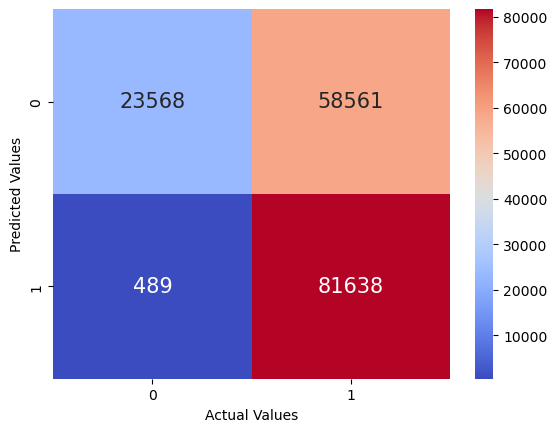

In [72]:
cf_matrix = confusion_matrix(y_test3, y_pred_cat)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Stochastic Gradient Descent

In [73]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)
sgbc.fit(X_train3, y_train3)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [74]:
y_pred_sgbc = sgbc.predict(X_test3)

In [75]:
# accuracy score

print(accuracy_score(y_train3, sgbc.predict(X_train3)))

sgbc_acc_adasyn = accuracy_score(y_test3, y_pred_sgbc)
sgbc_f1_adasyn = f1_score(y_test3, y_pred_sgbc, average='macro')
sgbc_precision_adasyn = precision_score(y_test3, y_pred_sgbc, average='macro')
sgbc_recall_adasyn = recall_score(y_test3, y_pred_sgbc, average='macro')
sgbc_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_sgbc)
print(sgbc_acc_adasyn)

0.9281979429215523
0.6788123417105006


In [76]:
# classification report
print(classification_report(y_test3, y_pred_sgbc))

              precision    recall  f1-score   support

           0       0.97      0.37      0.53     82129
           1       0.61      0.99      0.75     82127

    accuracy                           0.68    164256
   macro avg       0.79      0.68      0.64    164256
weighted avg       0.79      0.68      0.64    164256



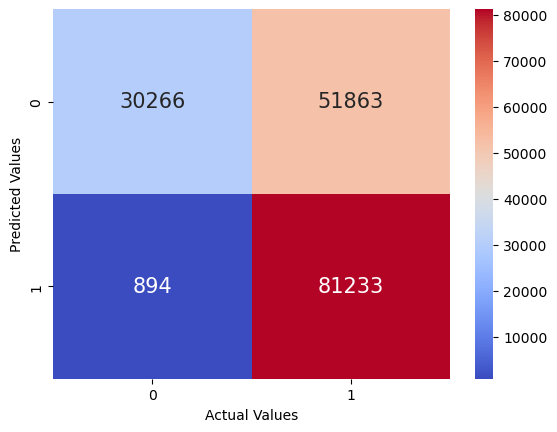

In [77]:
cf_matrix = confusion_matrix(y_test3, y_pred_sgbc)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
param_grid = { 
    #'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train3, y_train3)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [79]:
print(CV_dt.best_params_)
accuracy = CV_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 80.52%


In [80]:
dt = DecisionTreeClassifier(random_state=42, criterion= 'entropy', max_depth=8, max_features= 'sqrt')
dt.fit(X_train3, y_train3)
y_pred_dt = dt.predict(X_test3)
dt_acc_adasyn = accuracy_score(y_test3, y_pred_dt)
dt_f1_adasyn = f1_score(y_test3, y_pred_dt, average='macro')
dt_precision_adasyn = precision_score(y_test3, y_pred_dt, average='macro')
dt_recall_adasyn = recall_score(y_test3, y_pred_dt, average='macro')
dt_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_dt)

In [81]:
print(classification_report(y_test3,CV_dt.best_estimator_.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56     82129
           1       0.61      0.91      0.73     82127

    accuracy                           0.67    164256
   macro avg       0.72      0.67      0.65    164256
weighted avg       0.72      0.67      0.65    164256



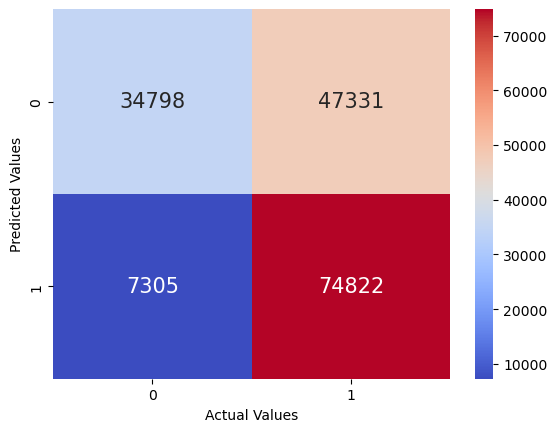

In [82]:
cf_matrix = confusion_matrix(y_test3,CV_dt.best_estimator_.predict(X_test3))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Random Forest

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train3, y_train3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [84]:
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


In [85]:
print(classification_report(y_test3,CV_rfc.best_estimator_.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     82129
           1       0.69      0.92      0.79     82127

    accuracy                           0.76    164256
   macro avg       0.79      0.76      0.75    164256
weighted avg       0.79      0.76      0.75    164256



In [86]:
rf = RandomForestClassifier(random_state=42, criterion= 'entropy', max_depth=5, max_features= 'sqrt', n_estimators= 500)
rf.fit(X_train3, y_train3)
y_pred_rf = rf.predict(X_test3)
rf_acc_adasyn = accuracy_score(y_test3, y_pred_rf)
rf_f1_adasyn = f1_score(y_test3, y_pred_rf, average='macro')
rf_precision_adasyn = precision_score(y_test3, y_pred_rf, average='macro')
rf_recall_adasyn = recall_score(y_test3, y_pred_rf, average='macro')
rf_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_rf)

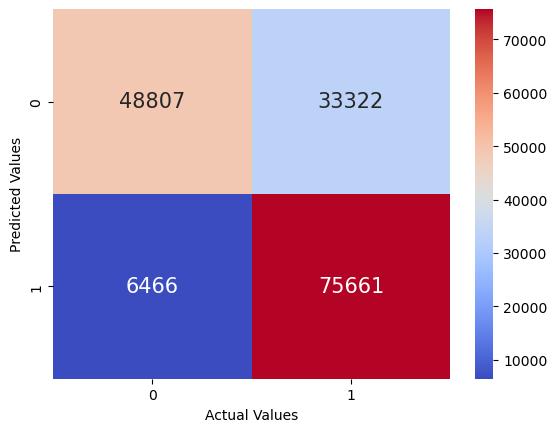

In [87]:
cf_matrix = confusion_matrix(y_test3,CV_rfc.best_estimator_.predict(X_test3))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Logistic Regression

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [
    {
        'C': [0.001,0.01,0.1,1,10,100,1000,2000,3500,5000,7500,10000,20000,35000,50000],
        'penalty': ['l2','l1'],
        'solver': ['liblinear','newton-cholesky', 'sag','newton-cg', 'lbfgs' ],
        #'n_jobs': [-1]
    }, 
    
]
logreg_cv=GridSearchCV(LogisticRegression(random_state=42,max_iter=30000),param_grid,cv=5)
logreg_cv.fit(X_train3,y_train3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning:

Rounding errors prevent the line search from converging

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:

The line search algorithm did not converge

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning:


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=30000, random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3500,
                                5000, 7500, 10000, 20000, 35000, 50000],
                          'penalty': ['l2', 'l1'],
                          'solver': ['liblinear', 'newton-cholesky', 'sag',
                                     'newton-cg', 'lbfgs']}])

In [89]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy))

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for our training dataset with tuning is : 74.16%


In [90]:
print(classification_report(y_test3,logreg_cv.best_estimator_.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74     82129
           1       0.73      0.76      0.75     82127

    accuracy                           0.74    164256
   macro avg       0.74      0.74      0.74    164256
weighted avg       0.74      0.74      0.74    164256



In [91]:
log_reg = LogisticRegression(random_state=42,max_iter=30000,C= 1, penalty= 'l1', solver= 'liblinear')
log_reg.fit(X_train3, y_train3)
y_pred_logreg = log_reg.predict(X_test3)
log_reg_acc_adasyn = accuracy_score(y_test3, y_pred_logreg)
log_reg_f1_adasyn = f1_score(y_test3, y_pred_logreg, average='macro')
log_reg_precision_adasyn = precision_score(y_test3, y_pred_logreg, average='macro')
log_reg_recall_adasyn = recall_score(y_test3, y_pred_logreg, average='macro')
log_reg_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_logreg)

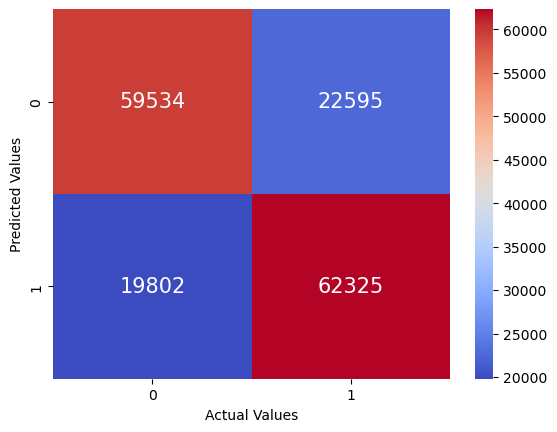

In [92]:
#plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test3,logreg_cv.best_estimator_.predict(X_test3))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### SGD Classifier

In [93]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}
grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train3, y_train3)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [94]:
# best parameter 
grid_search.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

In [95]:
sgd = SGDClassifier(alpha = 0.001, loss = 'hinge', penalty = 'l2')
sgd.fit(X_train3, y_train3)

SGDClassifier(alpha=0.001)

In [96]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 74.28%


In [97]:
# model predictions 
y_pred_sgd = sgd.predict(X_test3)

In [98]:
# accuracy score

print(accuracy_score(y_train3, sgd.predict(X_train3)))
sgd_acc_adasyn = accuracy_score(y_test3, y_pred_sgd)
sgd_f1_adasyn = f1_score(y_test3, y_pred_sgd, average='macro')
sgd_precision_adasyn = precision_score(y_test3, y_pred_sgd, average='macro')
sgd_recall_adasyn = recall_score(y_test3, y_pred_sgd, average='macro')
sgd_mcc_adasyn = matthews_corrcoef(y_test3, y_pred_sgd)
print(sgd_acc_adasyn)

0.7434496506306391
0.744228521332554


In [99]:
print(classification_report(y_test3, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     82129
           1       0.72      0.79      0.76     82127

    accuracy                           0.74    164256
   macro avg       0.75      0.74      0.74    164256
weighted avg       0.75      0.74      0.74    164256



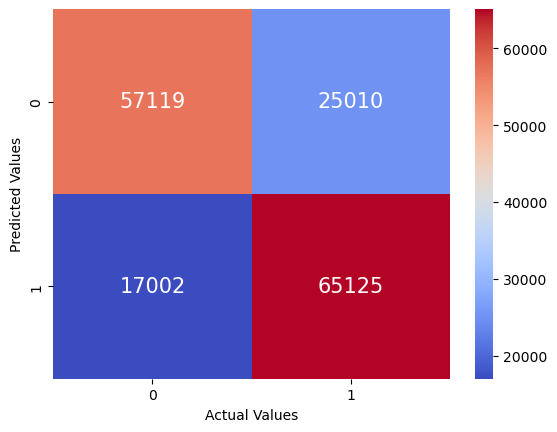

In [100]:
cf_matrix = confusion_matrix(y_test3, y_pred_sgd)
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### XG Boost

In [101]:
f=y_train3.astype(int)
f

array([1, 1, 1, ..., 1, 0, 0])

In [102]:
from xgboost import XGBClassifier
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

XGB_model = XGBClassifier(seed=42)
xgbcv=GridSearchCV(estimator=XGB_model,param_grid=params,cv=5)
xgbcv.fit(X_train3, f)

print(xgbcv.best_params_)
accuracy = xgbcv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

{'learning_rate': 0.1, 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 93.29%


In [103]:
f2=y_test3.astype(int)
f2

array([1, 1, 0, ..., 1, 0, 1])

In [104]:
print(classification_report(f2,xgbcv.best_estimator_.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.99      0.14      0.25     82129
           1       0.54      1.00      0.70     82127

    accuracy                           0.57    164256
   macro avg       0.76      0.57      0.48    164256
weighted avg       0.76      0.57      0.48    164256



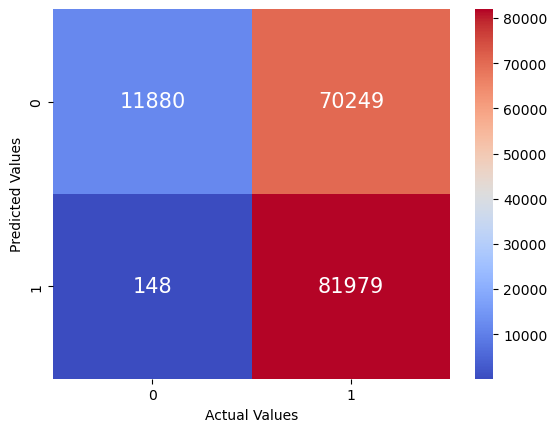

In [105]:
cf_matrix = confusion_matrix(f2,xgbcv.best_estimator_.predict(X_test3))
sns.heatmap(cf_matrix, cmap='coolwarm',annot = True, annot_kws = {'size':15}, fmt='d',xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [106]:
xgb = XGBClassifier(seed=42,learning_rate= 0.1, n_estimators= 500)
xgb.fit(X_train3, f)
y_pred_xgb = xgb.predict(X_test3)
xgb_acc_adasyn = accuracy_score(f2, y_pred_xgb)
xgb_f1_adasyn = f1_score(f2, y_pred_xgb, average='macro')
xgb_precision_adasyn = precision_score(f2, y_pred_xgb, average='macro')
xgb_recall_adasyn = recall_score(f2, y_pred_xgb, average='macro')
xgb_mcc_adasyn = matthews_corrcoef(f2, y_pred_xgb)

In [107]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XgBoost',
              'SGD Classifier','Ada Boost Classifier','Gradient Boosting Classifier',
              'Stochastic Gradient Boosting','CAT Boost', 'Extra Trees Classifier',
              'Linear Discriminant Analysis','Naive Bayes Classifier'],
    'Accuracy': [log_reg_acc_adasyn,rf_acc_adasyn,dt_acc_adasyn,xgb_acc_adasyn,sgd_acc_adasyn,ada_acc_adasyn,
                 gbc_acc_adasyn,sgbc_acc_adasyn,acc_cat_adasyn,etc_acc_adasyn,lda_acc_adasyn,gnb_acc_adasyn],
    'F1-Score': [log_reg_f1_adasyn,rf_f1_adasyn,dt_f1_adasyn,xgb_f1_adasyn,sgd_f1_adasyn,ada_f1_adasyn,gbc_f1_adasyn,
                 sgbc_f1_adasyn,cat_f1_adasyn,etc_f1_adasyn,lda_f1_adasyn,gnb_f1_adasyn],
    'Precision': [log_reg_precision_adasyn,rf_precision_adasyn,dt_precision_adasyn,xgb_precision_adasyn,
                  sgd_precision_adasyn,ada_precision_adasyn,gbc_precision_adasyn,sgbc_precision_adasyn,
                  cat_precision_adasyn,etc_precision_adasyn,lda_precision_adasyn,gnb_precision_adasyn],
    'Recall':[log_reg_recall_adasyn,rf_recall_adasyn,dt_recall_adasyn,xgb_recall_adasyn,sgd_recall_adasyn,
                  ada_recall_adasyn,gbc_recall_adasyn,sgbc_recall_adasyn,cat_recall_adasyn,etc_recall_adasyn,
                  lda_recall_adasyn,gnb_recall_adasyn],
    'MCC': [log_reg_mcc_adasyn,rf_mcc_adasyn,dt_mcc_adasyn,xgb_mcc_adasyn,sgd_mcc_adasyn,ada_mcc_adasyn,
            gbc_mcc_adasyn,sgbc_mcc_adasyn,cat_mcc_adasyn,etc_mcc_adasyn,lda_mcc_adasyn,gnb_mcc_adasyn]
})
models.sort_values(by = 'F1-Score', ascending = False)

Model  Accuracy  F1-Score  Precision    Recall  \
1       Random Forest Classifier  0.757768  0.751116   0.788631  0.757770   
4                 SGD Classifier  0.744229  0.743619   0.746573  0.744229   
10  Linear Discriminant Analysis  0.742810  0.742575   0.743699  0.742810   
0            Logistic Regression  0.741885  0.741810   0.742165  0.741885   
9         Extra Trees Classifier  0.713831  0.692010   0.798406  0.713834   
11        Naive Bayes Classifier  0.691920  0.689682   0.697620  0.691919   
2       Decision Tree Classifier  0.667373  0.646377   0.719512  0.667376   
7   Stochastic Gradient Boosting  0.678812  0.644594   0.790822  0.678816   
8                      CAT Boost  0.640500  0.589150   0.780987  0.640504   
6   Gradient Boosting Classifier  0.586517  0.502091   0.768924  0.586522   
3                        XgBoost  0.571419  0.475979   0.763112  0.571424   
5           Ada Boost Classifier  0.527341  0.391829   0.751586  0.527347   

         MCC  
1   0.545530  
4   0.490796  
10  0.486509  
0   0.484049  
9   0.505210  
11  0.389497  
2   0.383359  
7   0.456086  
8   0.397391  
6   0.305077  
3   0.274172  
5   0.165894